# Аналитический отчет для продюсеров образовательной программы Skillbox

<br><br>
**Основная цель: построение стратегии по модернизировании и улучшению курсов**
<br><br>


[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными


Структура: <br>
1. Расчет метрик:
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Визуализация
3. Выводы

_____________________________________________________________________


In [58]:
import pandas as pd
import numpy as np
from datetime import datetime
def convert_to_time(x): 
    """Функция конвертирует строку в тип datetime"""
    if x == np.nan or type(x) == float:
        return np.nan
    x = x.split('.')[0]  # В данных встречаются строки с долями секунд
    x = x.split('+')[0]  # Также необходимо для очистки данных от лишних данных в дате
    x = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    return x

# Объединение данных в один общий датасет

DataFrame = pd.read_csv("Data/progresses.csv")
DataFrame.columns = {'progress_id':str, 'student_id':str, 'course_id':str}

temp_DF = pd.read_csv("Data/progress_phases.csv")
temp_DF['start_date'] = temp_DF['start_date'].map(convert_to_time)
temp_DF['finish_date'] = temp_DF['finish_date'].map(convert_to_time)

DataFrame = temp_DF.merge(DataFrame, how='left', on='progress_id')

temp_DF = pd.read_csv("Data/courses.csv")
temp_DF.columns = ["#", "course_id", "course_title", "course_field"]
temp_DF = temp_DF.drop(labels='#', axis=1)  # В таблице удаляем лишний столбец

DataFrame = DataFrame.merge(temp_DF, how='right', on='course_id')  # Объединяем с результируюей таблицей

temp_DF = pd.read_csv("Data/course_contents.csv")
DataFrame = DataFrame.merge(temp_DF, how='right', on=['course_id', 'module_number', 'lesson_number'])
DataFrame.dropna(subset = ['progress_id'], inplace=True)
DataFrame.to_csv("Data/Total.csv", encoding='utf-8')

print('Completed')
DataFrame

Completed


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50,2018-06-23 08:28:52,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17,2019-03-18 14:54:50,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46,2019-07-11 08:03:09,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17,2018-07-27 16:13:55,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40,2019-04-24 18:44:57,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02,NaT,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55,NaT,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03,2019-07-03 18:22:44,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11,2019-07-11 17:46:08,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False


In [2]:
# Решение задания 1

#1.1 общее количество курсов в датасете

print('1.1. Общее количество курсов в датасете')

courses_list = DataFrame['course_title'].unique()
print(f"Общее количество курсов в датасете:  {np.count_nonzero(courses_list)}")

print()
#1.2 количество модулей на каждом курсе
print('1.2. Количество модулей на каждом курсе')

modules_in_courses = {}
for course_title in courses_list:
    modules_in_courses[course_title] = int(DataFrame[DataFrame.course_title == course_title]["module_title"].nunique())
    print(f"В курсе {course_title} {modules_in_courses[course_title]} модулей")


1.1. Общее количество курсов в датасете
Общее количество курсов в датасете:  15

1.2. Количество модулей на каждом курсе
В курсе Веб-дизайн PRO 2.0 17 модулей
В курсе Интернет-маркетолог от Ingate 18 модулей
В курсе UX-дизайн 20 модулей
В курсе JavaScript с нуля 18 модулей
В курсе Веб-дизайн с нуля 2.0 19 модулей
В курсе Веб-разработчик 20 модулей
В курсе Анимация интерфейсов 21 модулей
В курсе Веб-вёрстка для начинающих 2.0 8 модулей
В курсе Руководитель digital-проектов 17 модулей
В курсе PHP-разработчик с 0 до PRO. Часть 1 8 модулей
В курсе Excel Базовый 9 модулей
В курсе SMM-маркетолог от А до Я 11 модулей
В курсе Веб-дизайн Базовый 17 модулей
В курсе Java-разработчик 17 модулей
В курсе Java-разработчик c нуля 9 модулей


In [3]:

#1.3 количество уроков в каждом модуле на каждом курсе
print('1.3. Количество уроков в каждом модуле на каждом курсе')

lessons_in_courses = DataFrame[['course_title', 'module_title', 'lesson_title']].drop_duplicates()
lessons_in_courses = lessons_in_courses.groupby(['course_title', 'module_title']).agg(np.count_nonzero)
lessons_in_courses.columns = ['number_of_lessons']
lessons_in_courses

# Ниже код можно использоваь для построчного вывода таблицы
#for row in lessons_in_courses.index:
#    print(f"В курсе '{row[0]}' модуле '{row[1]}' {int(lessons_in_courses.loc[row])} уроков")

1.3. Количество уроков в каждом модуле на каждом курсе


number_of_lessons
course_title                  module_title                                                         
Excel Базовый                  Визуализация данных Excel                                          5
                              Основной функционал Excel                                          11
                              Основной функционал Excel (продолжение)                             7
                              Сводные таблицы Excel                                               5
                              Формулы и функции Excel. Более сложные формулы                      5
...                                                                                             ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                   5
                              Требовательность digital-продюсера                                  4
                              Управление временем                                                 4
                              Управление дизайнерами. Разработка дизайна по s...                  7
                              Экологичный путь менеджера                                          4

[229 rows x 1 columns]

In [4]:
#1.4 медианное количество уроков в модуле на каждом курсе
print('1.4. Медианное количество уроков в модуле на каждом курсе')

median_number_of_lessons = lessons_in_courses
median_number_of_lessons = lessons_in_courses.groupby('course_title')
median_number_of_lessons = median_number_of_lessons.agg(median_number_of_lessons = ('number_of_lessons', np.median))
median_number_of_lessons


1.4. Медианное количество уроков в модуле на каждом курсе


,median_number_of_lessons
course_title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,10.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


In [59]:
#1.5 количество учеников на каждом курсе
print('1.5. Количество учеников на каждом курсе')

number_of_students = DataFrame[['course_field', 'course_title', 'student_id']].drop_duplicates()
number_of_students = number_of_students.groupby(['course_field', 'course_title'])
number_of_students = number_of_students.agg(number_of_students = ('student_id', np.count_nonzero))
number_of_students

1.5. Количество учеников на каждом курсе


number_of_students
course_field course_title                                           
Business     Excel Базовый                                       782
             Руководитель digital-проектов                       685
Design       UX-дизайн                                          1151
             Анимация интерфейсов                                598
             Веб-дизайн PRO 2.0                                 1711
             Веб-дизайн Базовый                                  518
             Веб-дизайн с нуля 2.0                              2014
Development  Java-разработчик                                    763
             Java-разработчик c нуля                             581
             JavaScript с нуля                                   966
             PHP-разработчик с 0 до PRO. Часть 1                 854
             Веб-вёрстка для начинающих 2.0                     2004
             Веб-разработчик                                     628
Marketing    SMM-маркетолог от А до Я                            506
             Интернет-маркетолог от Ingate                      2168

In [11]:
from datetime import datetime, timedelta
#1.6 минимальный, максимальный, средний, медианный возраст студентов
print('1.6. Минимальный, максимальный, средний, медианный возраст студентов')

def to_date(x):
    """Функция конвертирует строку в дату"""
    if x == np.nan or type(x) == float:
        return np.nan
    x = datetime.strptime(x, "%Y-%m-%d")
    return x

def time_delta(x):
    if x == np.nan or type(x) == float:
        return np.nan
    if x.year < 1920 or x.year > 2006:  # Зачищает данные от слишком старых и слишком молодых, на данные даты приходится слишком большой перепад
        return np.nan
    else:
        return (datetime.now() - x).days // 365

students_age = pd.read_csv('Data/students.csv')
students_age.columns = ['id_', 'student_id', 'city', 'birthday']
students_age.birthday = students_age.birthday.map(to_date)
students_age['age'] = students_age.birthday.map(time_delta)

students_list = DataFrame.loc[:, ['course_title', 'student_id']].drop_duplicates()
students_list = students_list.merge(students_age, how='right', on='student_id').dropna()
students_list = students_list.sort_values(by="age")
students_list.to_csv("Data/students_list.csv", encoding='utf-8')
print(f"Минимальный возраст студентов: {int(np.min(students_list['age']))}")
print(f"Максимальный возраст студентов: {int(np.max(students_list['age']))}")
print(f"Средний возраст студентов: {int(np.mean(students_list['age']))}")
print(f"Медианный возраст студентов: {int(np.median(students_list['age']))}")

1.6. Минимальный, максимальный, средний, медианный возраст студентов
Минимальный возраст студентов: 13
Максимальный возраст студентов: 90
Средний возраст студентов: 29
Медианный возраст студентов: 29


In [39]:
#1.7 минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
print('1.7. Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе')

students_statistics = students_list[['course_title', 'student_id', 'age']].groupby(['course_title']).agg([np.min, np.max, np.mean, np.median])
students_statistics

1.7. Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе


age                        
                                     amin  amax       mean median
course_title                                                     
Excel Базовый                        16.0  60.0  33.611111   34.0
Java-разработчик                     14.0  64.0  29.242105   28.0
Java-разработчик c нуля              14.0  54.0  28.919355   28.0
JavaScript с нуля                    13.0  59.0  28.444444   28.0
PHP-разработчик с 0 до PRO. Часть 1  13.0  74.0  29.172156   28.0
SMM-маркетолог от А до Я             17.0  51.0  29.485849   29.0
UX-дизайн                            15.0  85.0  29.978571   29.0
Анимация интерфейсов                 15.0  51.0  29.447699   29.0
Веб-вёрстка для начинающих 2.0       13.0  59.0  28.365198   28.0
Веб-дизайн PRO 2.0                   14.0  59.0  28.366812   27.0
Веб-дизайн Базовый                   15.0  51.0  28.403509   27.0
Веб-дизайн с нуля 2.0                14.0  75.0  28.312268   27.0
Веб-разработчик                      13.0  50.0  27.967059   27.0
Интернет-маркетолог от Ingate        16.0  90.0  31.406538   30.0
Руководитель digital-проектов        20.0  47.0  31.656020   31.0

2. Bar-chart, отражающий количество студентов на каждом курсе


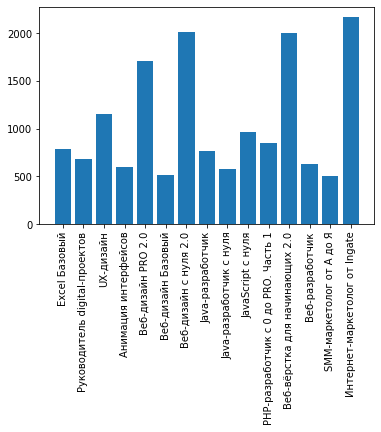

In [40]:
# 2. (m) Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
import matplotlib.pyplot as plt

print('2. Bar-chart, отражающий количество студентов на каждом курсе')

# Создаем обрасть графика и записываем списки со значениями для графика
fig, subplot = plt.subplots()
x_ticks = number_of_students.index.to_frame()['course_title'].values
y_ticks = number_of_students.number_of_students.values

subplot.bar(x_ticks, y_ticks)

# Каждую подпись поворачиваем
for label in subplot.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()

3. Сгруппированный горизонтальный bar-chart с отметкой медианы


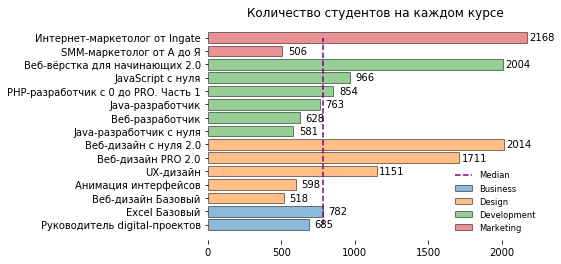

In [44]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

print('3. Сгруппированный горизонтальный bar-chart с отметкой медианы')
fig, subplot = plt.subplots()
rcParams['figure.edgecolor'] = 'black'

# Записываем направления обучения
legend_labels = number_of_students.index.to_frame()['course_field'].drop_duplicates().to_list()

# Списки, в которых будут храниться значения осей
x_ticks2 = []
y_ticks2 = []
labels = []
# Расчитываем медиану
median_number_of_students = np.median(number_of_students.number_of_students.values)


for group in legend_labels:
    # Проходим по каждой группе и добавляем группу на график
    x_ticks = number_of_students.sort_values('number_of_students').loc[group].index.to_list()
    y_ticks = number_of_students.sort_values('number_of_students').loc[group].number_of_students
    subplot.barh(x_ticks, y_ticks, label = group, alpha=0.5, edgecolor='black')  # Изменил прозрачность изображения, потому что на 0.1 не 
    
    # Для сохранения подписей
    x_ticks2.extend(x_ticks)
    y_ticks2.extend([median_number_of_students] * len(y_ticks))
    labels.extend(y_ticks)

# Добавляет подписи к столбикам
for x, y in zip(x_ticks2, labels):
    label = y
    plt.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15, -3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Изображаем медиану на графике
plt.plot(y_ticks2, x_ticks2, label='Median', linestyle='--', color='purple')

# Подпись и легенда
plt.title("Количество студентов на каждом курсе")
plt.legend(loc='best', fontsize='small', framealpha=0.5, edgecolor='w')
plt.box(False)  # Убирает рамку
plt.show()

-------------
-------------

## Ключевые выводы по первому заданию

<br>Количество студентов</br>
- Всего было куплено 15,929 курсов
- Самый популярный курс: `Интернет-маркетолог от Ingate`, направление маркетинг, на нем обучается 2,168 студентов, т.е. около 14% от всех курсов
- Второй по популярности курс `Веб-дизайн с нуля 2.0`, направление дизайн, с 2,014  студентами
- Третий по популярности курс `Веб-верстка для начинающих 2.0`, направление разработка, на нем 2,004 студентов
- Таким образом все топ-3 курса проходят по разным направлениям
- Медианное количество студентов на курсе - 782 студента, на графике видно, что только 5 курсов (из 15) существенно отклонились от данного показателя
- Меньше всего студентов на курсах `SMM-маркетолог от А до Я` и `Веб-дизайн Базовый`

<br>Возвраст студентов</br>
- Среди студентов, указавших возраст есть те, кто не указал каких-либо данных, либо данные были некорректны, исходные данные были скорректированы на таких учеников
- Самому молодому студенту - 13 лет, он проходит сразу 3 курса, самому возрастному - 90, он учился на интернет-маркетинге
- Медианный возраст среди студентов 28 лет, а средний - 29, что говорит о невысокой возрастной разнице среди учащихся
- Самые "возрастные" курсы - это `Excel Базовый` и `Руководитель digital-проектов`, медианный возраст на этих курсах 34 и 31, соответственно
- На самых "молодых" курсах медианный возраст составляет 27 лет, к ним относятся: `Веб-вёрстка для начинающих 2.0`, `Веб-дизайн PRO 2.0`, `Веб-дизайн Базовый`, `Веб-дизайн с нуля 2.0`, `Веб-разработчик`

<br>Структура курсов</br>
- Всего было рассмотрено 15 курсов
- На каждом курсе разбирается от 8 до 21 модулей
- Меньше всего модулей по двум направлениям - `PHP-разработчик с 0 до PRO. Часть 1`, `Веб-вёрстка для начинающих 2.0` - в данных курсах по 8 модулей
- Больше всего модулей по двум направлениям - `Анимация интерфейсов` и `Веб-разработчик` - 21 модуль и 20 соответственно
- При этом только 2 урока за модуль в среднем проходят на курсе `Веб-разработчик`

-------------
-------------

## 2. Расчет потенциальной нагрузки на преподавателей

1. Прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно).
2. Визуализация
3. Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса. 
5. Визуализация
6. Выводы

In [3]:
import pandas as pd
import numpy as np

# Загружается DataFrame для определения урока в котором проводится первое дз для каждого курса
main = pd.read_csv("Data/Total.csv", index_col=0)
print('Completed')

Completed


In [55]:

from datetime import datetime
print('2.1 Прирост студентов на каждом курсе по месяцам')

# Запоминаем строки только имеющие отношение к домашней работе
first_homework_in_course = main[main.is_homework == True]  
first_homework_in_course.start_date = pd.to_datetime(first_homework_in_course.start_date)  # Переводим в формат дат

# Выделяем только первые дз всех студентов
first_homework_in_course = first_homework_in_course.groupby(['course_title', 'student_id'])
first_homework_in_course = first_homework_in_course.start_date.agg(np.min).reset_index()

# Расчет прироста количества студентов через группировку по курсу и классу Grouper с периодичностью начало месяца
increase_in_students = first_homework_in_course.groupby(['course_title', pd.Grouper(key='start_date', freq='MS')])
increase_in_students = increase_in_students.agg(new_students=('student_id', 'size'))
increase_in_students

2.1 Прирост студентов на каждом курсе по месяцам


new_students
course_title                  start_date              
Excel Базовый                 2018-02-01             6
                              2018-03-01             3
                              2018-05-01             3
                              2018-06-01             9
                              2018-07-01            13
...                                                ...
Руководитель digital-проектов 2019-03-01            36
                              2019-04-01            17
                              2019-05-01            25
                              2019-06-01            15
                              2019-07-01            20

[244 rows x 1 columns]

2.2. Прирост студентов на каждом курсе


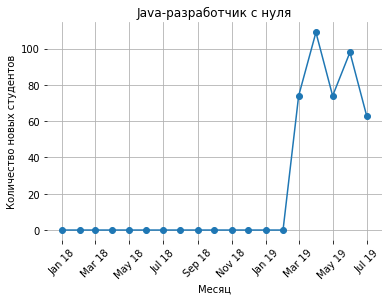

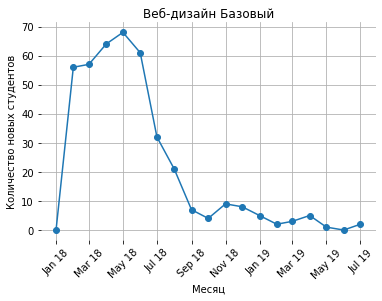

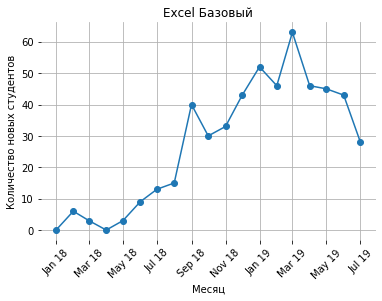

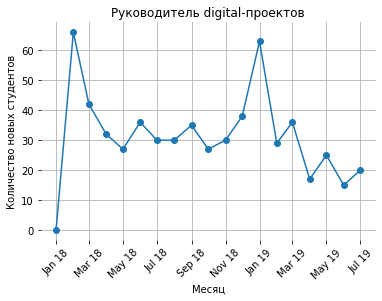

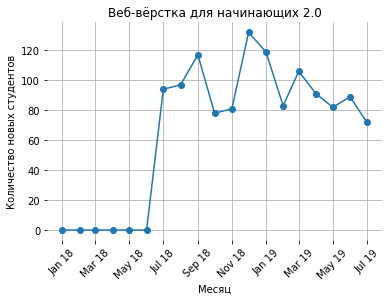

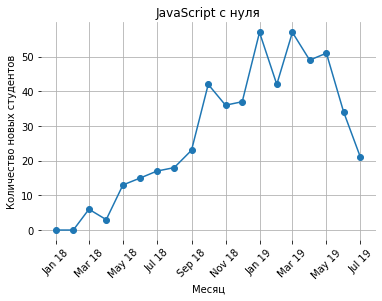

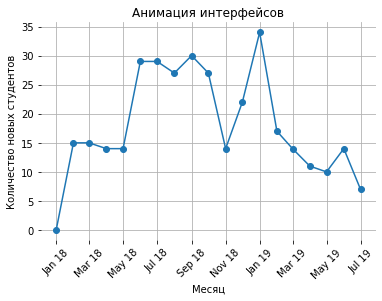

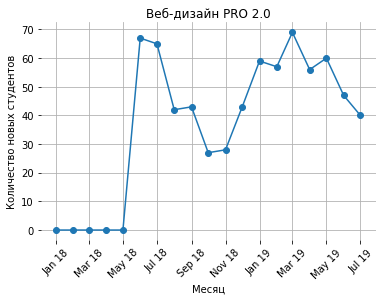

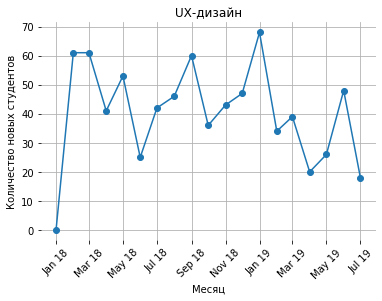

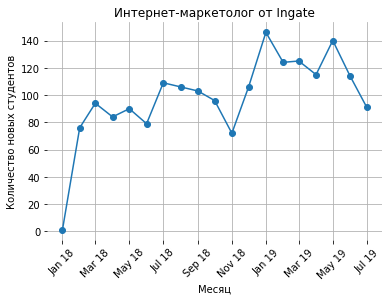

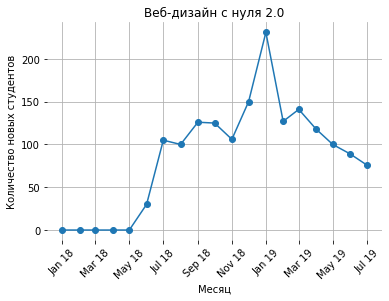

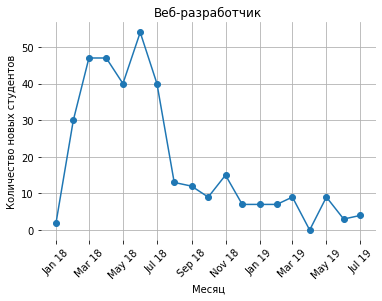

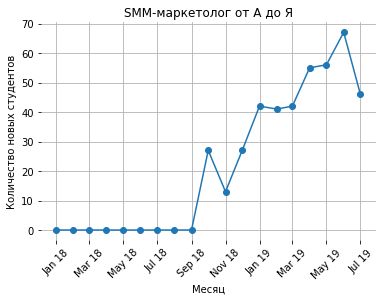

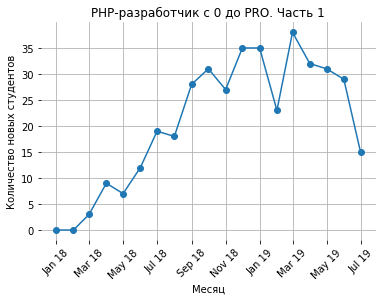

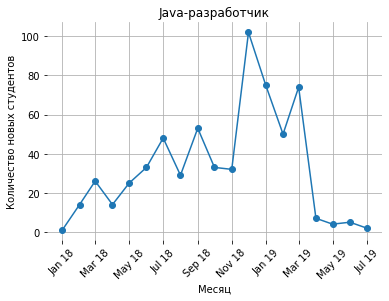

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Используется для работы с датами на графике

print('2.2. Прирост студентов на каждом курсе')

def compound(input_list):
    """Делает список накопленным итогом"""
    result = input_list.copy()
    for i, element in enumerate(result):
        if i==0:
            result[i] = element
        else:
            result[i] = element + result[i-1]
    return result

def print_graphs(courses_list):
    for course in courses_list:    
        fig, subplot = plt.subplots()  # Чтобы сделать 15 графиков нужно сделать область построения для каждого курса

        # Формат вывода дат на ось
        xfmt = mdates.DateFormatter('%b %y')  
        subplot.xaxis.set_major_formatter(xfmt)

        # Задаем значения оси Y для выбранного курса
        y_ticks = increase_in_students.loc[course]

        # Важно: некоторые месяцы не принесли новых студентов, необходимо их отметить
        # Сначала задаем period - период дат, в которые идет анализ
        period = pd.DataFrame({'period' : pd.date_range('01/01/2018','07/01/2019', freq='MS')})
        # Объединяем его со значениями 
        y_ticks = period.merge(y_ticks, how='left', left_on=['period'], right_on=['start_date'])

        # Сохраняем даты для графика в списке
        x_ticks = y_ticks['period'].to_list()
        # Заполняем NaN нулями и переводим в список
        y_ticks = y_ticks.fillna(0)['new_students'].to_list()

        # Для вывода накопленным итогом можно раскомментировать строку
        #y_ticks = compound(y_ticks)

        # Строим график курса
        subplot.plot(x_ticks, y_ticks, marker='o')
        plt.title(course) 
        plt.xlabel('Месяц')  # Подпись оси X
        plt.ylabel('Количество новых студентов')  # Подпись оси X
        plt.grid()
        plt.box(False)  # Убирает рамку
        # Разврачиваем подписи, чтобы были читаемы
        for label in subplot.xaxis.get_ticklabels():
            label.set_rotation(45)
            
courses_list = pd.read_csv("Data/courses.csv", index_col=0)  # Выгружаем список курсов
print_graphs(courses_list.title.values)

2.3. Прирост студентов по месяцам для всех курсов


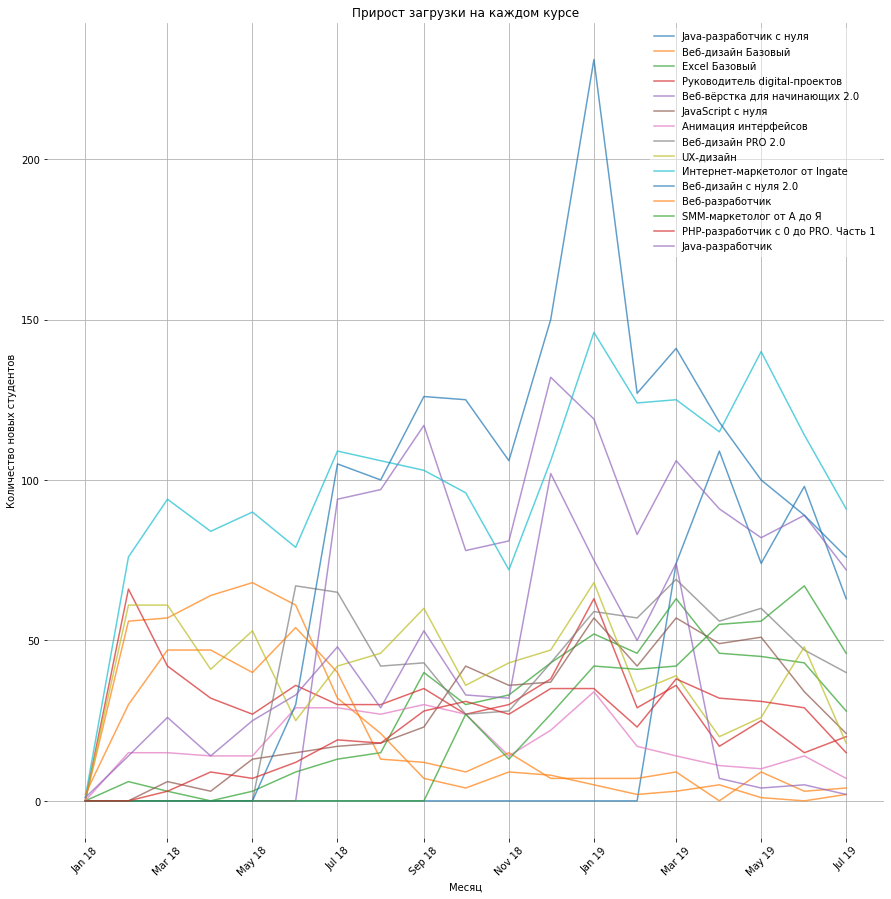

In [43]:
print("2.3. Прирост студентов по месяцам для всех курсов")

def print_increase_one_chart(courses_list):
    fig, subplot = plt.subplots()
    xfmt = mdates.DateFormatter('%b %y')
    subplot.xaxis.set_major_formatter(xfmt)

    for course in courses_list:
        # Задаем значения оси Y для выбранного курса
        y_ticks = increase_in_students.loc[course]

        # Важно: некоторые месяцы не принесли новых студентов, необходимо их отметить
        # Сначала задаем period - период дат, в которые идет анализ
        period = pd.DataFrame({'period' : pd.date_range('01/01/2018','07/01/2019', freq='MS')})
        # Объединяем его со значениями 
        y_ticks = period.merge(y_ticks, how='left', left_on=['period'], right_on=['start_date'])

        # Сохраняем даты для графика в списке
        x_ticks = y_ticks['period'].to_list()
        # Заполняем NaN нулями и переводим в список
        y_ticks = y_ticks.fillna(0)['new_students'].to_list()

        # Закомментить, если не нарастающим списком
        #y_ticks = compound(y_ticks)

        subplot.plot(x_ticks, y_ticks, label=course, alpha=0.7)


    plt.title("Прирост загрузки на каждом курсе") 
    plt.grid()
    plt.xlabel('Месяц')  # Подпись оси X
    plt.ylabel('Количество новых студентов')  # Подпись оси X
    plt.box(False)  # Убирает рамку
    plt.legend(framealpha=0.5, edgecolor='w')
    for label in subplot.xaxis.get_ticklabels():
        label.set_rotation(45)

    fig.set_figwidth(15)
    fig.set_figheight(15)
    
print_increase_one_chart(courses_list.title.values)

In [12]:
print('2.4. Количество прогрессов по месяцам')

# Подготовка данных
progresses = main[main.is_homework == True]  # Запоминаем строки только имеющие отношение к домашней работе
progresses = progresses.dropna(subset=['finish_date'])  # Убираем все незаконченные домашние задания, поскольку не создают нагрузку на преподавателей
progresses = progresses[[ 'progress_id', 'course_title', 'module_title', 'start_date', 'finish_date']]  # Оставляем нужные столбцы
progresses = progresses.set_index(['progress_id', 'course_title', 'module_title'])
# Преобразуем даты в нужный формат
progresses.start_date = pd.to_datetime(progresses.start_date, format="%Y-%m-%d %H:%M:%S")
progresses['progress_month'] = pd.to_datetime(progresses.start_date.dt.strftime('01-%m-%Y'), format="%d-%m-%Y")
progresses.finish_date = pd.to_datetime(progresses.finish_date, format="%Y-%m-%d %H:%M:%S")
progresses['finish_date1'] = pd.to_datetime(progresses.finish_date.dt.strftime('01-%m-%Y'), format="%d-%m-%Y")

# Проверяем вмещается ли прогресс в один месяц
progresses['several_months'] = (progresses.finish_date.dt.month != progresses.start_date.dt.month)

# Вырезаем из массива все прогрессы, которые необходимо учесть в нескольких месяцах
needs_to_split = progresses[progresses.several_months == True]
progresses = progresses.drop(needs_to_split.index)
check = progresses.start_date.count()
needs_to_split['months_until_finish'] = (needs_to_split.finish_date.dt.year - needs_to_split.start_date.dt.year)*12 + needs_to_split.finish_date.dt.month - needs_to_split.start_date.dt.month + 1
check += needs_to_split.months_until_finish.sum()
progresses = progresses.drop(['finish_date', 'finish_date1', 'several_months', 'start_date'], axis=1)
#needs_to_split.sort_values('months_until_finish')

# Обрабатываем строки, которые нужно разделить
def make_date_range(a):
    """Функция возвращает список из месяцев в заданном диапазоне
    На входе принимает DataFrame
    Возвращает list из datetime"""
    return pd.date_range(a['progress_month'],
                         a['finish_date1'],
                         freq='MS').to_list()

# Запоминаем для каждой строки список месяцев, в которых был данный прогресс
needs_to_split['months_range'] = needs_to_split.apply(make_date_range, axis=1)
temp = needs_to_split.months_range.apply(pd.Series)  # Из списка делаем таблицу, при этом индексы сохраняются
# Делаем слияние таблицы с отметками месяцев
needs_to_split = temp.merge(needs_to_split, right_index=True, left_index=True).drop(['months_range',
                                                                                     'finish_date',
                                                                                     'several_months',
                                                                                     'months_until_finish'], axis=1)
needs_to_split = needs_to_split.reset_index()  # Необходимо, чтобы преобразовать отдельные колонки в строки
needs_to_split = needs_to_split.melt(id_vars=['progress_id', 'course_title', 'module_title'],
                                     value_vars=temp.columns,
                                     value_name='progress_month')
needs_to_split = needs_to_split.drop(['variable'], axis=1).dropna().set_index(['progress_id', 'course_title', 'module_title'])

progresses = progresses.append(needs_to_split).reset_index()
progresses = progresses.groupby(['course_title', 'progress_month']).agg(homeworks_in_process = ('progress_id','size'))
progresses

2.4. Количество прогрессов по месяцам


homeworks_in_process
course_title                  progress_month                      
Excel Базовый                 2018-02-01                        35
                              2018-03-01                         6
                              2018-04-01                        12
                              2018-05-01                        17
                              2018-06-01                        34
...                                                            ...
Руководитель digital-проектов 2019-03-01                       348
                              2019-04-01                       264
                              2019-05-01                       256
                              2019-06-01                       172
                              2019-07-01                       103

[258 rows x 1 columns]

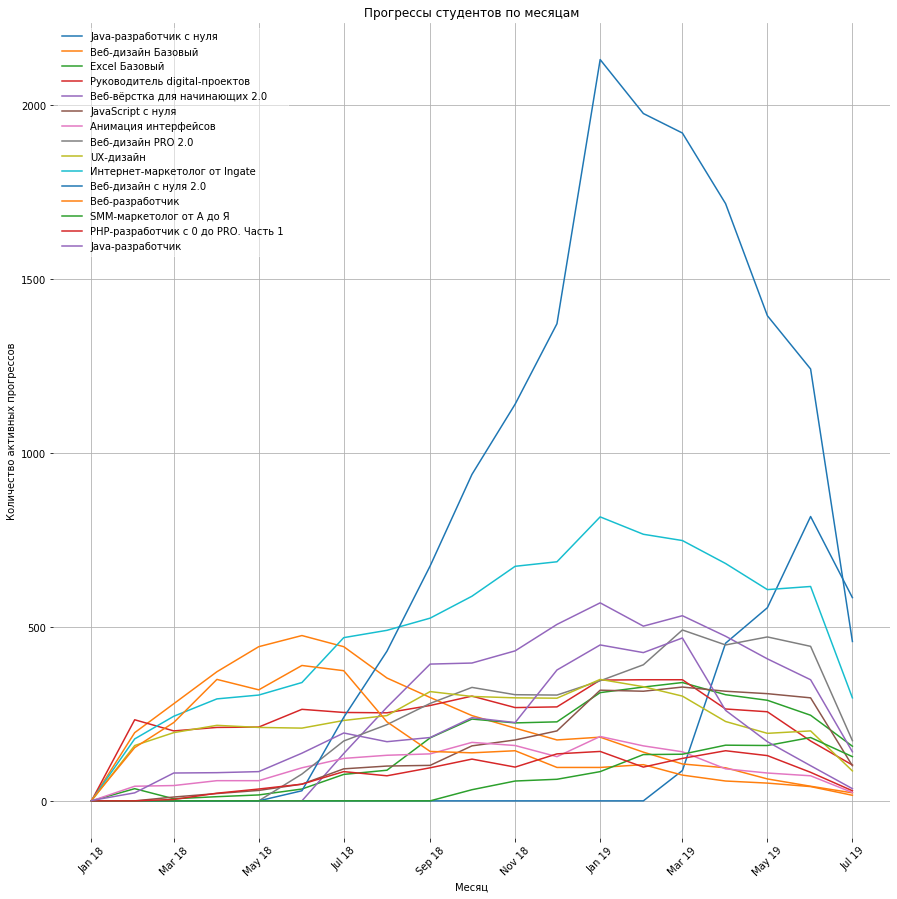

In [51]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Используется для работы с датами на графике

def print_progresses_one_chart(courses_list):
    fig, subplot = plt.subplots()  # Одна область рисования

    # Формат вывода дат на ось
    xfmt = mdates.DateFormatter('%b %y')  
    subplot.xaxis.set_major_formatter(xfmt)

    for course in courses_list:    

        # Важно: в некоторые месяцы не было нагрузки, необходимо их отметить
        # Сначала задаем period - период дат, в которые идет анализ
        period = pd.DataFrame({'period' : pd.date_range('01/01/2018','07/01/2019', freq='MS')})  # Начинаем анализ с 2018, поскольку до этого почти нет активности
        # Объединяем его со значениями 
        y_ticks = progresses.loc[course]
        y_ticks = period.merge(y_ticks, how='left', left_on=['period'], right_on=['progress_month'])


        # Задаем ось X и ось Y по выделенному курсу
        x_ticks = y_ticks['period'].to_list()
        y_ticks = y_ticks.fillna(0)
        y_ticks = y_ticks['homeworks_in_process'].to_list()

        subplot.plot(x_ticks, y_ticks, label=course)

    plt.title('Прогрессы студентов по месяцам') 
    plt.xlabel('Месяц')  # Подпись оси X
    plt.ylabel('Количество активных прогрессов')  # Подпись оси X
    plt.grid()
    plt.legend(framealpha=0.5, edgecolor='w')

    plt.box(False)  # Убирает рамку
    for label in subplot.xaxis.get_ticklabels():
        label.set_rotation(45)

    fig.set_figwidth(15)
    fig.set_figheight(15)
    
courses_list = pd.read_csv("Data/courses.csv", index_col=0)  # Выгружаем список курсов
print_progresses_one_chart(courses_list.title.values)

-------------------------------------------------------------------------
-------------------------------------------------------------------------
## Ключевые выводы по загрузке преподавателей
<i>(выводы приведены по топ-3 направлениям: `Интернет-маркетолог от Ingate`, `Веб-дизайн с нуля 2.0`, `Веб-вёрстка для начинающих 2.0`)</i>

<b>Прирост загрузки преподавателей</b>

- Загрузка преподавателей может быть рассчитана множеством методов, одной из самых простых метрик является количество активных студентов на каждом курсе (активных поскольку значительная часть студентов купила курсы и не приступала к выполнению домашних заданий, что в свою очередь не создает нагрузки на преподавателей)

- Больше всего студентов принялось к домашним заданиям на курсах `Интернет-маркетолог от Ingate` - 1,871 студента (86% купивших), `Веб-дизайн с нуля 2.0` - 1,624 (81% купивших), и `Веб-вёрстка для начинающих 2.0` - 1,241 студент (62% купивших). Подробная таблица приведена ниже

- На курсе `Веб-дизайн PRO 2.0` только 41% студентов, купивших изначально курс, приступили к первому домашнему заданию, это наименьшее значение по всем курсам, а на курсе `Руководитель digital-проектов` более 87% приступило к домашним заданиям, это самое высокое значение

In [60]:
increase_by_course = increase_in_students.reset_index().groupby(['course_title']).sum().sort_values('new_students', ascending=False)
increase_by_course['percent_of_bought'] = increase_by_course.new_students / number_of_students.reset_index().set_index('course_title').number_of_students * 100
TOP3_INDEX = increase_by_course.head(3).index
increase_by_course

,new_students,percent_of_bought
course_title,,
Интернет-маркетолог от Ingate,1871,86.300738
Веб-дизайн с нуля 2.0,1624,80.635551
Веб-вёрстка для начинающих 2.0,1241,61.926148
UX-дизайн,773,67.158992
Веб-дизайн PRO 2.0,703,41.087084
Java-разработчик,627,82.175623
Руководитель digital-проектов,600,87.591241
JavaScript с нуля,521,53.933747
Excel Базовый,518,66.240409



<b>Прирост загрузки по месяцам</b>

- По месяцам динамика домашних заданий на топ-3 направллениях довольно разноплановая (ниже приведен график)

- На курсе `Интернет-маркетолог от Ingate` первые студенты появились уже в январе 2018, тогда как по двум другим только после июня 2018

- В ноябре 2018 по всем топ-3 курсам произошло незначительное снижение роста нагрузки на преподавателей

- В декабре-январе 2019 по всем направлениям наблюдается резкий рост загрузки преподавателей, аналогичные скачки, но меньше, есть в июле 2018 и марте 2018. Данная динамика соотносится с динамикой прироста количества студентов на курсах и наиболее вероятно связана с промо-акциями, проводимыми Skillbox

- Стоит отметить, что на курсе `Веб-дизайн с нуля 2.0` динамика прироста загрузки преподавателей в целом нисходящая - так прирост загрузки сокращается в 2019 году

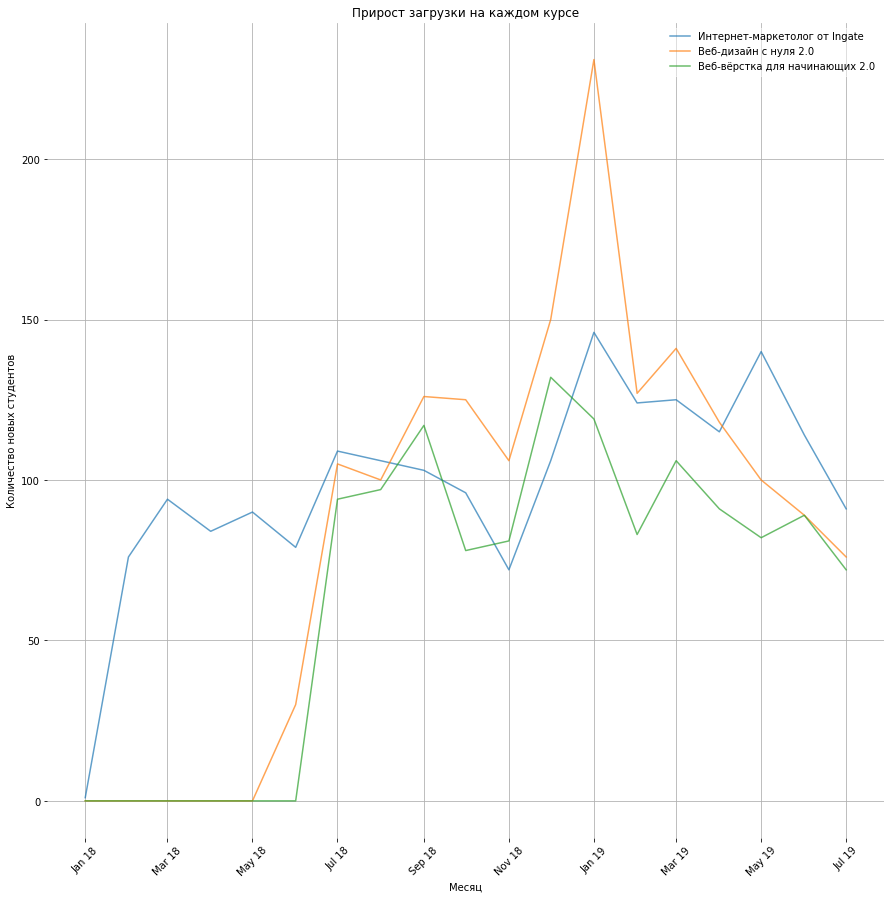

In [53]:
print_increase_one_chart(TOP3_INDEX.to_list())



<b>Помесячная загрузка - количество прогрессов</b>

- Другой метрикой для оценки загруженности преподавателей может быть общее количество активных прогрессов выполнения домашних заданий. При этом в анализе не учитывались незаконченные домашние задания, считая, что они не создают нагрузки на преподавателей

- Считаем, что один активный прогресс создает, как минимум, одно домашнее задание в месяц на преподавателя на проверку, а также необходимость отвечать на вопросы студентов

- На временной шкале прогрессы распределяется в форме колокола с пиком в январе 2019 - в период наибольших продаж всех топ-3 курсов, после пика по всем направлениям идет снижение количества активных прогрессов по домашним заданиям

- Снижение активности по домашним заданиям может быть связано с тем, что какая-то часть студентов, начавших курс до пикового января 2019, постепенно завершают прохождение курса (успешно или бросают не закончив)

- По курсу `Веб-дизайн с нуля 2.0` снижение количества активных прогрессов за полгода (с января 2019 по июль 2019) составило более 4х раз

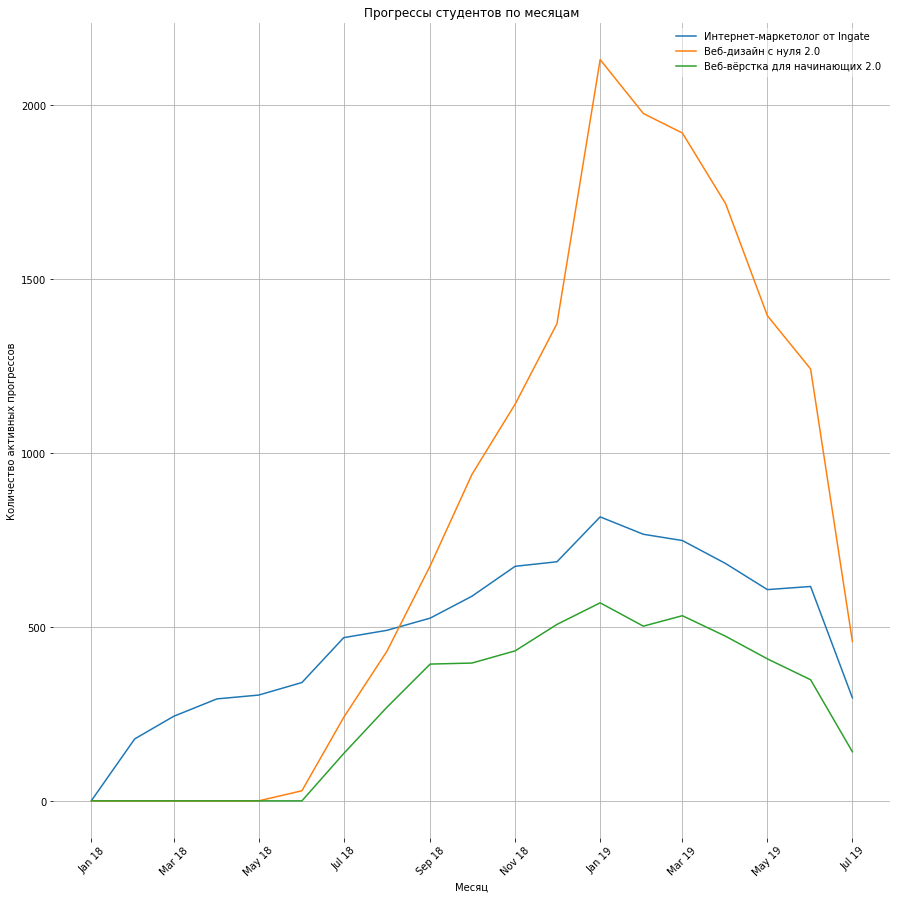

In [52]:
print_progresses_one_chart(TOP3_INDEX)

-------------------------------------------------------------------------
-------------------------------------------------------------------------

## 3. Выявление проблемных модулей

1. Время прохождения каждого модуля
2. Визуализация
3. Сезонность
4. Визуализация

In [17]:

import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta

print('3.1. Время прохождения каждого модуля')
print('Таблица modules_completion')
# Задаем группировку согласно заданию
agg = {'completion_time': [np.min, np.max, np.mean, np.median]}

modules_completion = main[main.is_homework == True][['progress_id', 
                                                     'student_id',
                                                    'module_number', 
                                                    'start_date', 'finish_date', 
                                                    'course_title', "module_title"]]

# Преобразование дат в формат datetime
modules_completion.finish_date = pd.to_datetime(modules_completion.finish_date)
modules_completion.start_date = pd.to_datetime(modules_completion.start_date)

# Вырезаем незаконченные модули
modules_not_completed = modules_completion[modules_completion.finish_date.isnull()]
modules_completion = modules_completion.dropna()

# Меняем начало и конец для модулей, где несколько домашних заданий 
modules_completion = modules_completion.groupby(['progress_id', 
                                                    'student_id',
                                                    'course_title', 
                                                    "module_title", 
                                                    'module_number'])
modules_completion = modules_completion.agg({'start_date' : np.min, 'finish_date' : np.max})
modules_completion = modules_completion.reset_index() 

# Расчет показателей прохождения курса
modules_completion['completion_time'] = modules_completion.finish_date - modules_completion.start_date
modules_completion['completion_time'] = modules_completion['completion_time'].values.astype(np.int64)
modules_completion = modules_completion.groupby(['course_title', 'module_title', 'module_number']).agg({**agg})

agg_columns = modules_completion['completion_time'].columns.to_list()
for sub_column in agg_columns:
    modules_completion[('completion_time',sub_column)] = pd.to_timedelta(modules_completion[('completion_time',sub_column)])

#modules_not_completed[modules_not_completed.module_number == 1].sort_values('module_number')
modules_completion = modules_completion.sort_values(by=['course_title', 'module_number'])
modules_completion.loc[TOP3_INDEX]

3.1. Время прохождения каждого модуля
Таблица modules_completion


completion_time  \
                                                                                                           amin   
course_title                   module_title                                       module_number                   
Веб-вёрстка для начинающих 2.0 Вводный модуль                                     1             0 days 00:00:00   
                               HTML                                               2             0 days 00:00:00   
                               Основы CSS                                         3             0 days 00:00:00   
                               Основы JavaScript                                  4             0 days 00:00:00   
                               Адаптивность и кроссбраузерность                   5             0 days 00:00:00   
                               Оформление                                         6             0 days 00:00:00   
                               Advanced CSS                                       7             0 days 00:00:00   
                               Инструменты верстальщика                           8             1 days 20:31:43   
Веб-дизайн с нуля 2.0          Введение и первый результат                        1             0 days 00:00:00   
                               Тренды, подготовка, мудборды                       3             0 days 00:00:00   
                               Работа со стилями. Создание GUI                    4             0 days 00:00:00   
                               Главная страница, первые шаги                      5             0 days 00:00:00   
                               Основы работы с графикой                           7             0 days 00:00:00   
                               Декомпозиция                                       9             0 days 00:00:00   
                               Навигация и структура                              10            0 days 00:00:00   
                               Интересная подача информации                       11            0 days 00:00:00   
                               Формы и кнопки                                     12            0 days 00:00:00   
                                Адаптивность и мобильная версия                   13            0 days 00:52:38   
                               Цвета, настроение. Промо-страница мероприятия.     14            0 days 02:34:08   
                               Декомпозиция промо-страницы                        15            0 days 05:10:17   
                               3D-элементы в Photoshop                            16            0 days 00:10:32   
                               Презентация для клиента                            17            0 days 01:36:05   
                               Передача проекта в верстку                         18            0 days 01:11:29   
                               Первый кейс на Behance                             19            0 days 03:11:44   
Интернет-маркетолог от Ingate  Введение в интернет-маркетинг: цели, инструмент... 1             0 days 00:00:00   
                               Исследование целевой аудитории: портретирование... 2             0 days 00:00:00   
                               SEO: больше, чем поисковая выдача (обновление о... 3             0 days 00:00:00   
                               Управление репутацией (SERM)                       4             0 days 00:00:00   
                               Медийная реклама и RTB: охват или целевые польз... 5             0 days 00:00:00   
                               Контекстная реклама в Yandex Direct и Google Ad... 6             0 days 00:00:00   
                               Маркетплейсы                                       7             0 days 00:00:00   
                               SMM (обновление от 15 февраля 2019 г)              8             0 days 00:00:00   
                               Таргетированная реклама в социальных сет

3.2. График медианного времени прохождения модулей по курсам


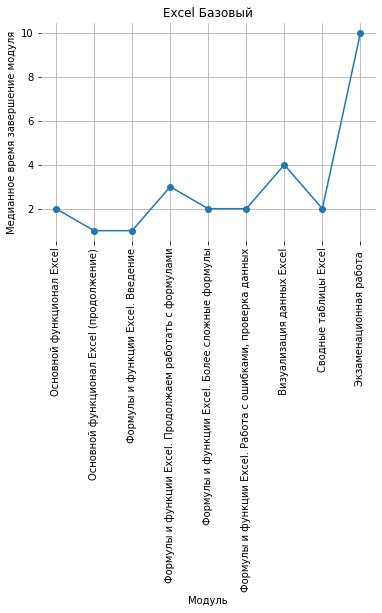

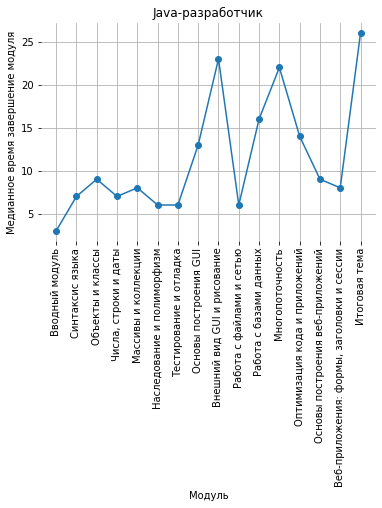

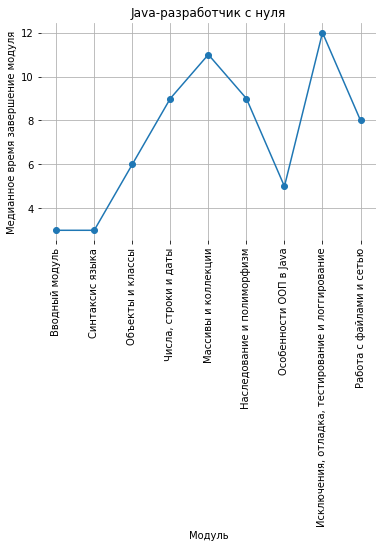

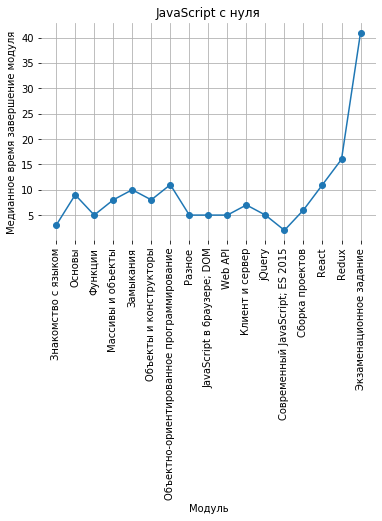

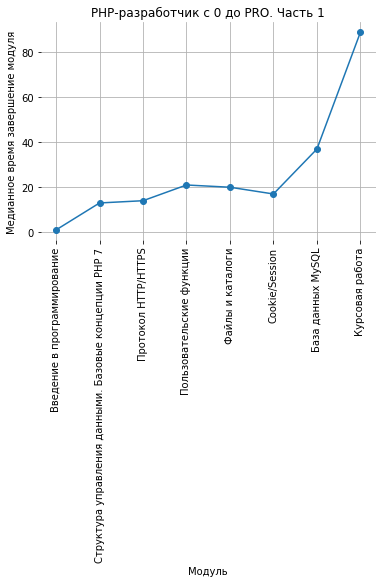

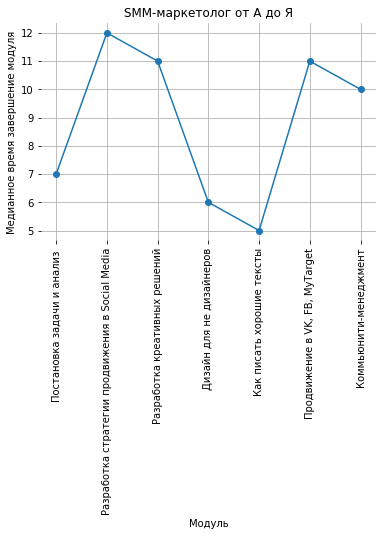

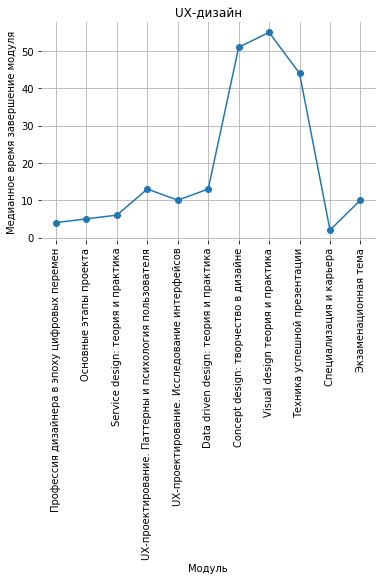

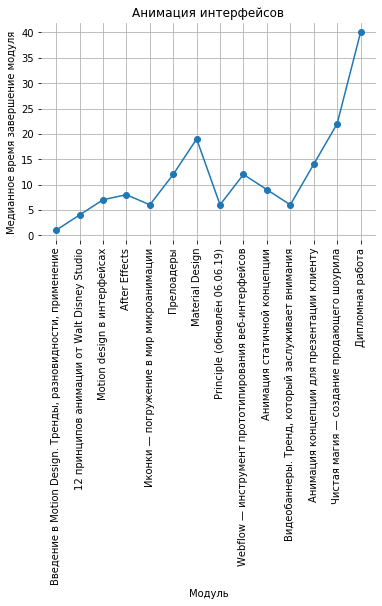

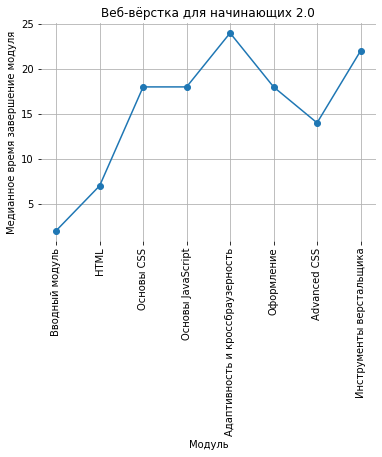

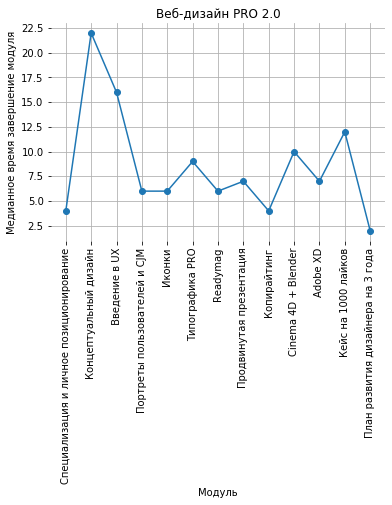

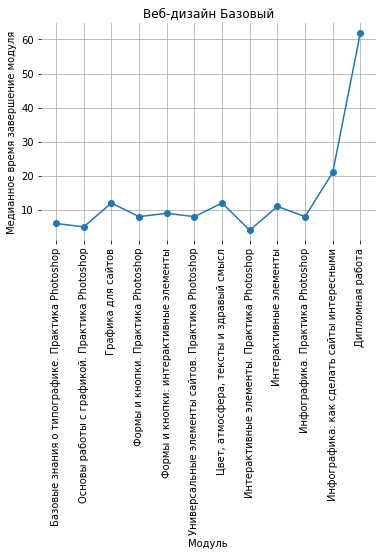

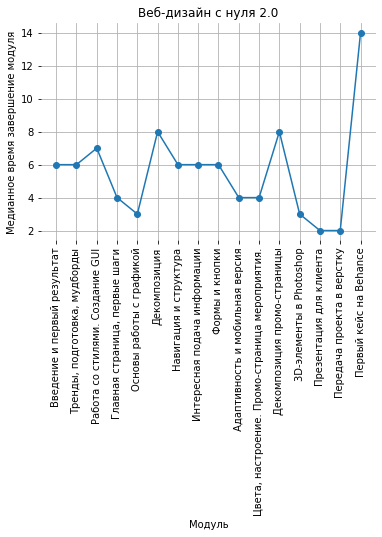

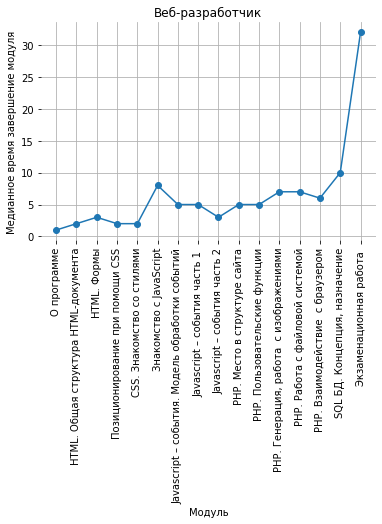

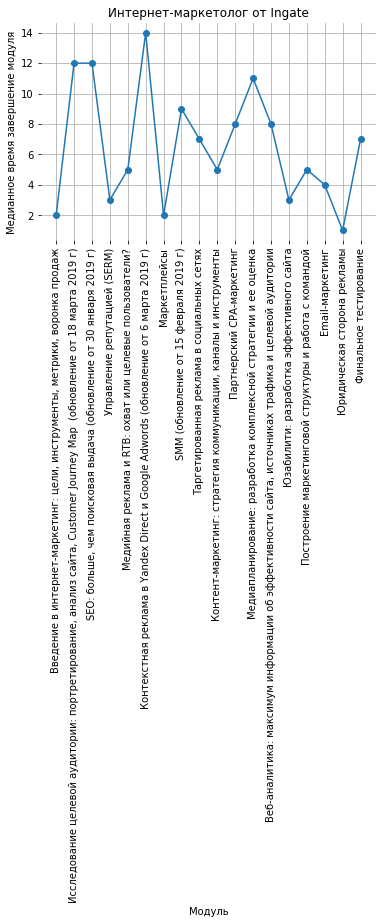

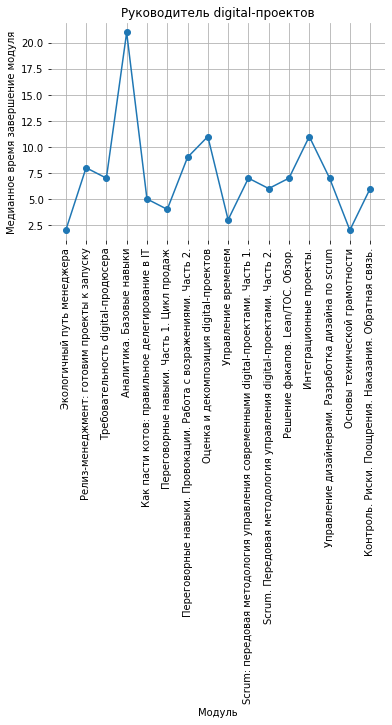

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Используется для работы с датами на графике

print('3.2. График медианного времени прохождения модулей по курсам')

courses_list = modules_completion.index.levels[0].drop_duplicates()  # Выгружаем список курсов

def print_modules_completion_time(courses_list):

    for course in courses_list:    
        fig, subplot = plt.subplots()  # Чтобы сделать 15 графиков нужно сделать область построения для каждого курса

        # Задаем ось X и ось Y по выделенному курсу
        x_ticks = modules_completion.loc[course].index.get_level_values(level=0).to_list()
        y_ticks = modules_completion.loc[course]['completion_time']['median'].dt.days.to_list()

        subplot.plot(x_ticks, y_ticks, marker='o')
        plt.title(course) 
        plt.xlabel('Модуль')  # Подпись оси X
        plt.ylabel('Медианное время завершение модуля')  # Подпись оси X
        plt.grid()
        plt.box(False)  # Убирает рамку
        for label in subplot.xaxis.get_ticklabels():
            label.set_rotation(90)

print_modules_completion_time(courses_list.values)    

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta

print('3.3. Сезонность прохождения курсов')
print('TOP-3 элемента таблицы сезонности')

seanonalities = main[main.is_homework == True][['progress_id', 
                                                'student_id',
                                                'module_number', 
                                                'start_date', 'finish_date', 
                                                'course_title', "module_title"]]

# Преобразование дат в формат datetime
seanonalities.finish_date = pd.to_datetime(seanonalities.finish_date)
seanonalities.start_date = pd.to_datetime(seanonalities.start_date)

seanonalities = seanonalities.dropna()

seanonalities['completion_time'] = seanonalities.finish_date - seanonalities.start_date
seanonalities['completion_time'] = seanonalities['completion_time'].values.astype(np.int64)
seanonalities['month'] = seanonalities.start_date.dt.month
seanonalities['month_name'] = seanonalities.start_date.dt.strftime('%b')
seanonalities = seanonalities.groupby(['course_title', 'month', 'month_name']).agg({'completion_time' : np.median})
seanonalities.completion_time = pd.to_timedelta(seanonalities.completion_time)
seanonalities = seanonalities.sort_values(['course_title', 'month'])
seanonalities.loc[TOP3_INDEX]

3.3. Сезонность прохождения курсов
TOP-3 элемента таблицы сезонности


completion_time
course_title                   month month_name                       
Веб-вёрстка для начинающих 2.0 1     Jan               9 days 08:25:32
                               2     Feb        9 days 02:37:32.500000
                               3     Mar               8 days 09:40:23
                               4     Apr               9 days 11:33:59
                               5     May               8 days 06:19:46
                               6     Jun        5 days 11:51:02.500000
                               7     Jul               3 days 05:31:36
                               8     Aug        7 days 18:36:20.500000
                               9     Sep              10 days 01:59:10
                               10    Oct              11 days 22:13:22
                               11    Nov        9 days 18:39:02.500000
                               12    Dec               8 days 11:40:18
Веб-дизайн с нуля 2.0          1     Jan               5 days 16:47:41
                               2     Feb               6 days 03:35:39
                               3     Mar        4 days 13:26:49.500000
                               4     Apr        4 days 09:01:05.500000
                               5     May               4 days 00:03:46
                               6     Jun        3 days 13:17:25.500000
                               7     Jul               3 days 10:29:15
                               8     Aug               7 days 08:00:53
                               9     Sep               8 days 10:24:32
                               10    Oct               7 days 13:39:41
                               11    Nov               7 days 16:32:03
                               12    Dec        7 days 00:49:24.500000
Интернет-маркетолог от Ingate  1     Jan               5 days 21:54:06
                               2     Feb        4 days 00:07:10.500000
                               3     Mar        6 days 20:02:26.500000
                               4     Apr               7 days 06:51:02
                               5     May        7 days 15:19:49.500000
                               6     Jun               5 days 20:38:28
                               7     Jul        4 days 06:42:23.500000
                               8     Aug        7 days 00:15:31.500000
                               9     Sep               4 days 20:08:15
                               10    Oct               7 days 12:05:32
                               11    Nov               6 days 16:10:00
                               12    Dec        5 days 02:42:59.500000

График сезонности прохождения модулей


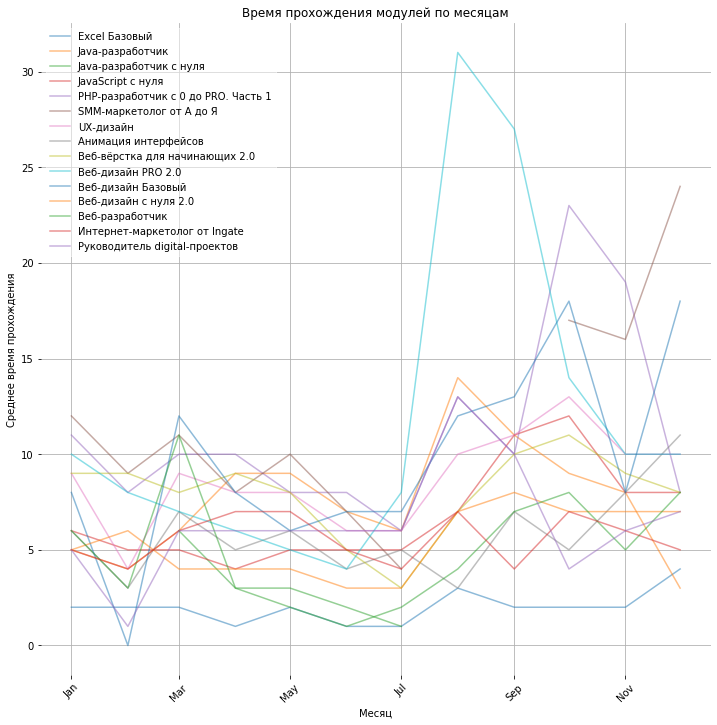

In [89]:
print("График сезонности прохождения модулей")

def print_seasonality_for_completion(courses_list):
    fig, subplot = plt.subplots()
    xfmt = mdates.DateFormatter('%b')
    subplot.xaxis.set_major_formatter(xfmt)
    for course in courses_list:
        x_ticks = [pd.datetime(2019, x, 1) for x in range(1,13)]
        #x_ticks = mdates.date2num(x_ticks)
        temp = pd.DataFrame([x for x in range(1,13)], columns=['month'])
        temp = temp.set_index('month')
        y_ticks = seanonalities.loc[course]
        y_ticks = temp.merge(y_ticks, how='left', left_on='month', right_on='month')
        y_ticks = y_ticks.completion_time.dt.days.to_list()
        
        subplot.plot(x_ticks, y_ticks, label=course, alpha=0.5)

    plt.title("Время прохождения модулей по месяцам") 
    plt.grid()
    plt.xlabel('Месяц')  # Подпись оси X
    plt.ylabel('Среднее время прохождения')  # Подпись оси Y
    plt.box(False)  # Убирает рамку
    plt.legend(framealpha=0.5, edgecolor='w')
    for label in subplot.xaxis.get_ticklabels():
        label.set_rotation(45)

    fig.set_figwidth(12)
    fig.set_figheight(12)


courses_list = seanonalities.index.levels[0].to_list()
print_seasonality_for_completion(courses_list)

-------------------------------------------------------------------------
-------------------------------------------------------------------------
## Ключевые выводы по проблемным модулям
<i>(выводы приведены по топ-3 направлениям: `Интернет-маркетолог от Ingate`, `Веб-дизайн с нуля 2.0`, `Веб-вёрстка для начинающих 2.0`)</i>

<b>Время прохождения модулей</b>

- Курс `Интернет-маркетолог от Ingate` проходит с большим разбросом времени прохождения курса (см. график внизу) - сложно выделить какие-то резкие перепады, поскольку весь курс задания делаются по-разному.
    
    Самый быстрый модуль на курсе чаще всего проходят за 1 день, а самый долгий - за 14 дней. При этом стоит отметить, что финальный модуль на данном курсе проходят быстрее, чем в двух других. Максимальное время прохождения всех трех курсов было зафиксировано на данном курсе по модулю <i>"Исследование целевой аудитории: портретирование, анализ сайта, Customer Journey Map"</i>, ученик проходил модуль 464 дня - при медианном времени прохождения 12 дней. Это второй по порядку модуль в курсе, возможно, длинное время прохождения связано с низкой мотивацией новых студентов, аналогичная ситуация и с первым модулем, максимальное время прохождения - 444 дня.

- Курс `Веб-дизайн с нуля 2.0` имеет довольно ровную структуру курса по времени прохождения, каждый модуль делается 4 или 8 дней. Финальное задание на курсе делается почти в два раза дольше, чем все предыдущие модули - 14 дней.

    Модули курса <i>"Главная страница, первые шаги"</i> и <i>"Основы работы с графикой"</i> на фоне остальных модулей выделяются низким медианным временем прохождения курса, возможно, это свидетельствует о недостаточом количестве практической работы, либо простых заданиях на модулях.

- Курс `Веб-верстка для начинающих 2.0`  - исходя из времени медианного прохождения курса, он построен на постепенно увеличивающейся сложности - каждый последующий модуль проходили дольше, чем предыдущий. Только модули <i>"Оформление"</i> и <i>"Advanced CSS"</i> чаще всего делают быстрее, чем предыдущие модули - возможно, это свидетельствует о довольно простой практической работе, либо недостаточном количестве заданий.


Медианное время прохождения модуля


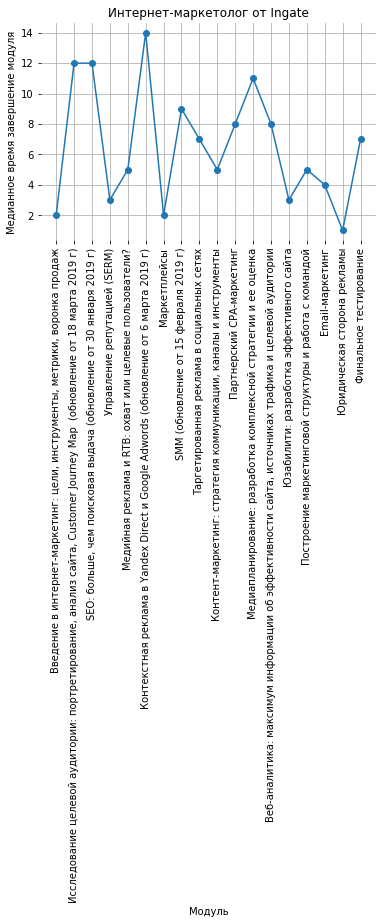

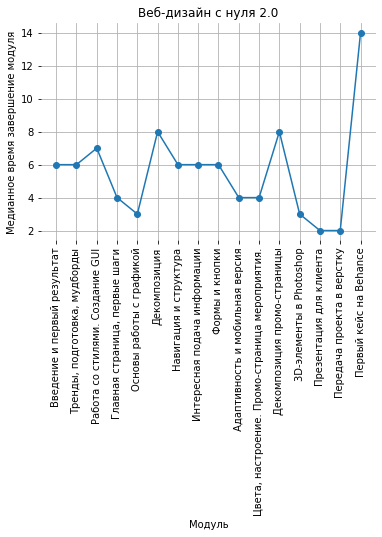

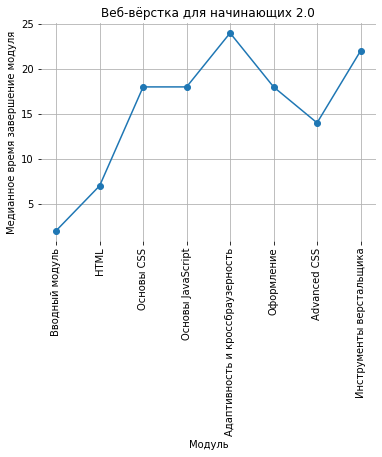

In [88]:
print_modules_completion_time(TOP3_INDEX)
print('Медианное время прохождения модуля')

<b>Сезонность в прохождение курса</b>

- Ускорение во времени прохождения топ-3 курсов наблюдается в июле - там модули проходили менее, чем за 4 дня. Возможный эффект на скорость производит отпускной период - у людей появляется больше времени на изучение курса

- В сентябре-октябре время прохождения возврастает по всем трем курсам - вероятнее всего закончившийся сезон отпусков и активная работа в осенний период влияет на время прохождения

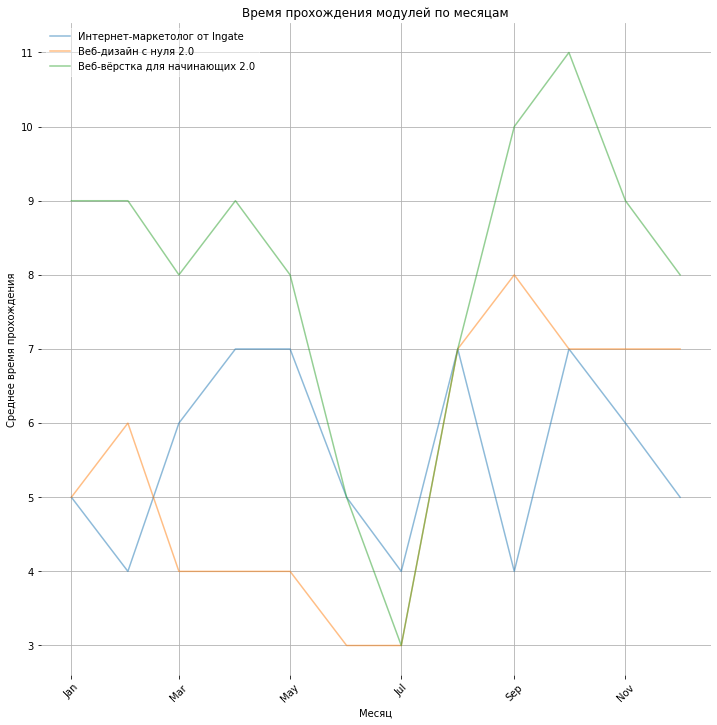

In [91]:
print_seasonality_for_completion(TOP3_INDEX)

## 4. Расчет конверсии

1. Конверсия перехода студентов из одного модуля в другой на каждом курсе.
2. Визуализация
3. Выводы

In [49]:
print("4.1. Конверсия перехода студентов на новые модули")

conversion_ratio = main[main.is_homework == True][['progress_id',
                                                   'student_id',
                                                   'module_number', 
                                                   'start_date', 'finish_date', 
                                                   'course_title', "module_title"]]

# Преобразование дат в формат datetime
conversion_ratio.finish_date = pd.to_datetime(conversion_ratio.finish_date)
conversion_ratio.start_date = pd.to_datetime(conversion_ratio.start_date)


# Меняем начало и конец для модулей, где несколько домашних заданий 
conversion_ratio = conversion_ratio.groupby(['student_id',
                                             'course_title', 
                                             "module_title", 
                                             'module_number'])
def start(x): 
    return x.iloc[0]

def end(x):
    return x.iloc[-1]

conversion_ratio = conversion_ratio.agg({'start_date' : start, 
                                         'finish_date' : end})

conversion_ratio = conversion_ratio.reset_index().fillna(0)


aggregation = {'started':('start_date', np.size),
              'completed':('finish_date', np.count_nonzero)}
conversion_ratio = conversion_ratio.groupby(['course_title', 'module_title', 'module_number']).agg(**aggregation)
conversion_ratio = conversion_ratio.sort_values(['course_title', 'module_number'])

# Рассчитываем коэффициент конверсии
def conversion_ratio_calc(a):
        """Функция считает коэффициет конверсии
        Отношение количества студентов в модуле к количеству студентов, 
        сдавших дз в предыдущем модуле"""
        a['conversion'] = a.started / a.completed.shift(periods=1)  # Функция shift сдвигает массив на periods вперед
        return a

conversion_ratio = conversion_ratio.groupby(['course_title']).apply(conversion_ratio_calc)
conversion_ratio

4.1. Конверсия перехода студентов на новые модули


started  \
course_title                  module_title                                       module_number            
Excel Базовый                 Основной функционал Excel                          1                  518   
                              Основной функционал Excel (продолжение)            2                  434   
                              Формулы и функции Excel. Введение                  3                  398   
                              Формулы и функции Excel. Продолжаем работать с ... 4                  345   
                              Формулы и функции Excel. Более сложные формулы     5                  298   
...                                                                                                 ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                  95   
                              Интеграционные проекты.                            13                  87   
                              Управление дизайнерами. Разработка дизайна по s... 14                  71   
                              Основы технической грамотности                     15                  66   
                              Контроль. Риски. Поощрения. Наказания. Обратная... 16                  64   

                                                                                                completed  \
course_title                  module_title                                       module_number              
Excel Базовый                 Основной функционал Excel                          1                    458   
                              Основной функционал Excel (продолжение)            2                    406   
                              Формулы и функции Excel. Введение                  3                    387   
                              Формулы и функции Excel. Продолжаем работать с ... 4                    303   
                              Формулы и функции Excel. Более сложные формулы     5                    270   
...                                                                                                   ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                    88   
                              Интеграционные проекты.                            13                    69   
                              Управление дизайнерами. Разработка дизайна по s... 14                    64   
                              Основы технической грамотности                     15                    64   
                              Контроль. Риски. Поощрения. Наказания. Обратная... 16                    58   

                                                                                                conversion  
course_title                  module_title                                       module_number              
Excel Базовый                 Основной функционал Excel                          1                     NaN  
                              Основной функционал Excel (продолжение)            2                0.947598  
                              Формулы и функции Excel. Введение                  3                0.980296  
                              Формулы и функции Excel. Продолжаем работать с ... 4                0.891473  
                              Формулы и функции Excel. Более сложные формулы     5                0.983498  
...                                                                                                    ...  
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12               0.969388  
                              Интеграционные проекты.                            13               0.988636  
                              Управление дизайнерами. Разработка дизайна по s... 14               1.028986  
                              Основы технической грамотности                     15    

4.2. График конверсии студентов от модуля к модулю


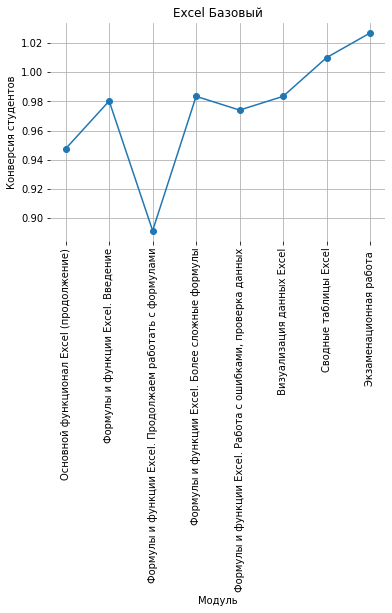

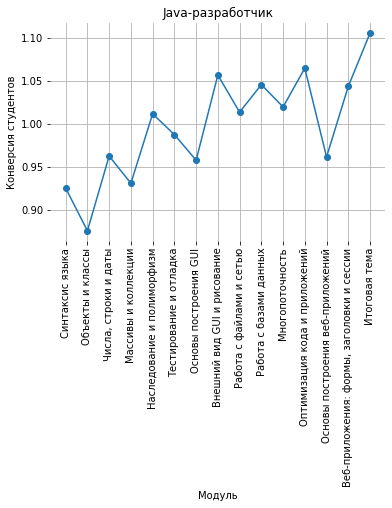

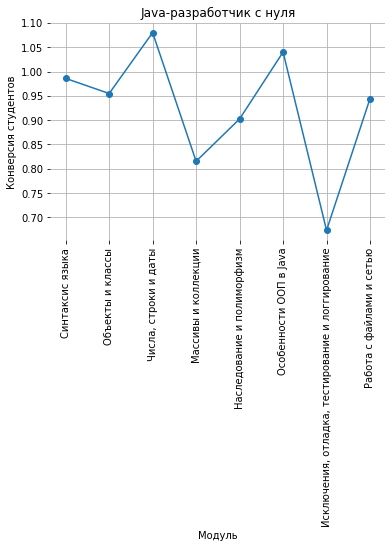

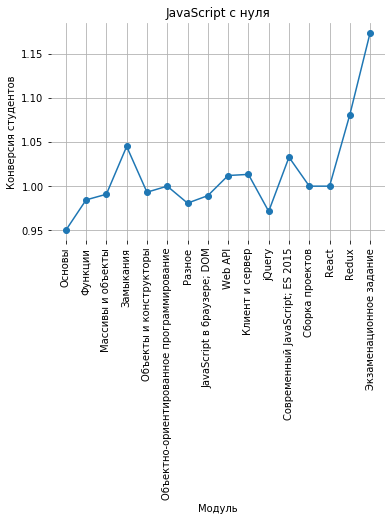

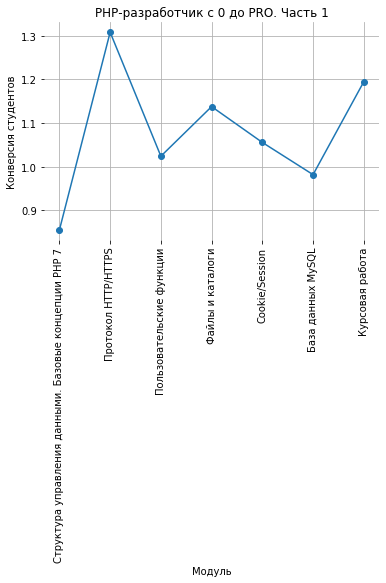

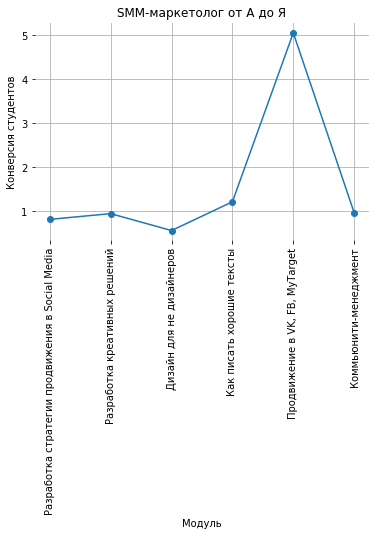

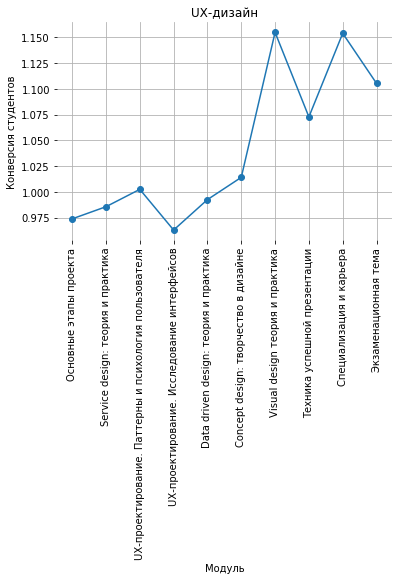

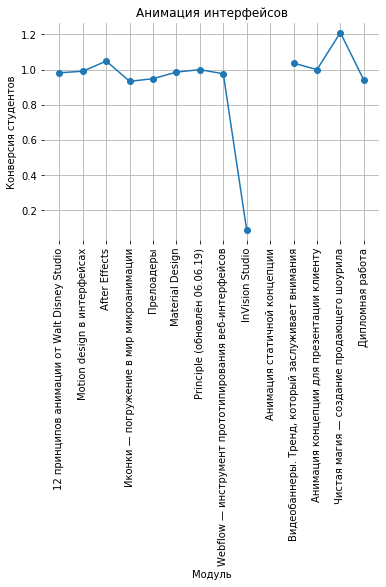

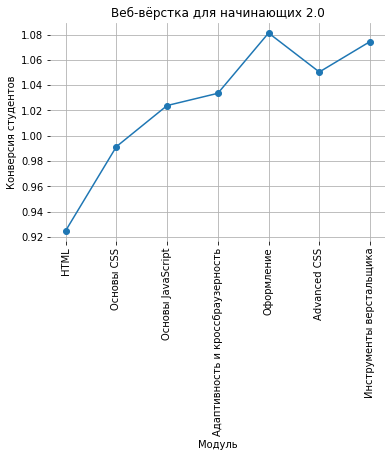

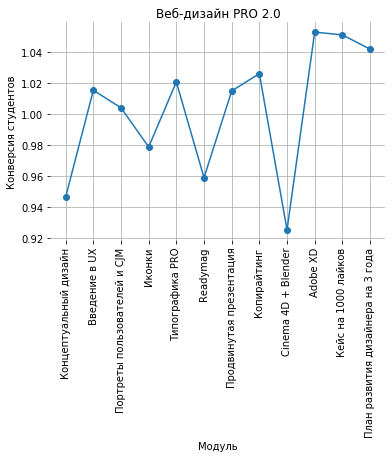

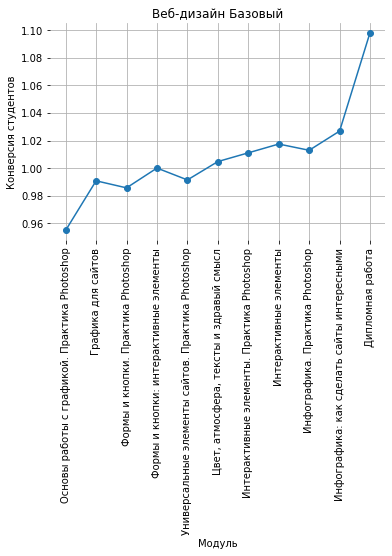

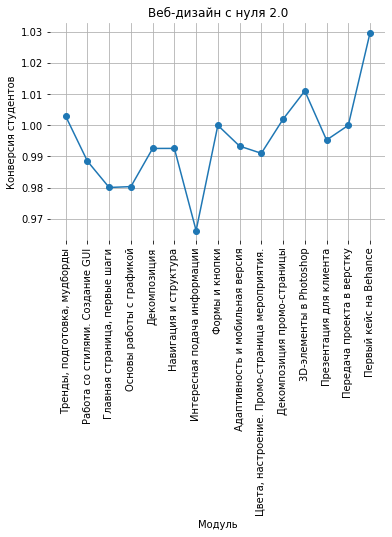

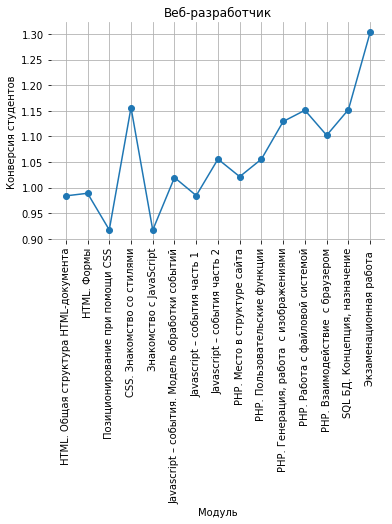

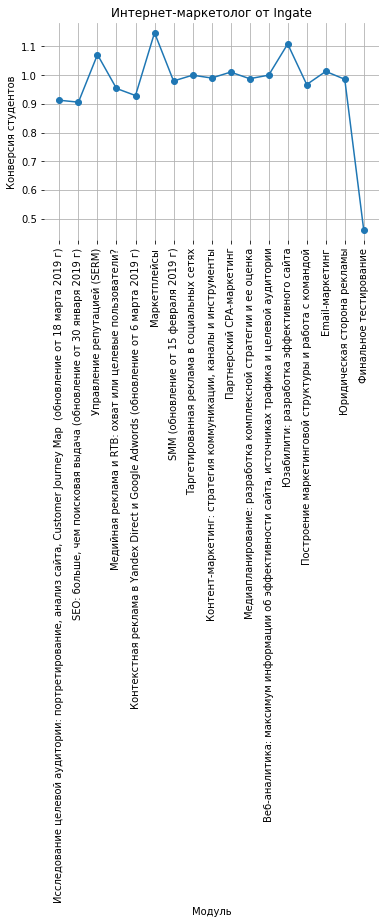

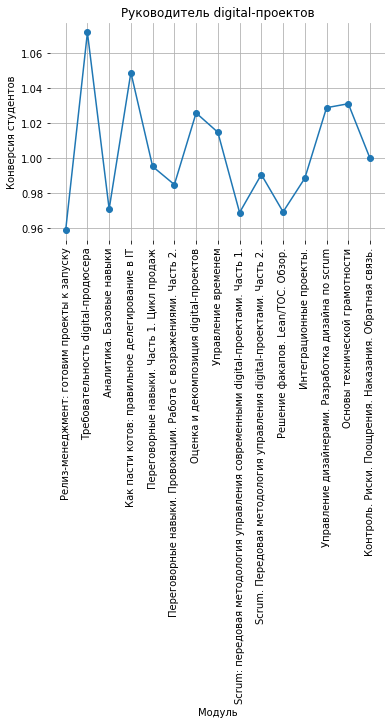

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Используется для работы с датами на графике

print('4.2. График конверсии студентов от модуля к модулю')

courses_list = conversion_ratio.index.levels[0].drop_duplicates()  # Выгружаем список курсов

def print_modules_conversion(courses_list):

    for course in courses_list:    
        fig, subplot = plt.subplots()  # Чтобы сделать 15 графиков нужно сделать область построения для каждого курса

        # Задаем ось X и ось Y по выделенному курсу
        x_ticks = conversion_ratio.loc[course].index.get_level_values(level=0).to_list()
        y_ticks = conversion_ratio.loc[course]['conversion'].to_list()

        subplot.plot(x_ticks, y_ticks, marker='o')
        plt.title(course) 
        plt.xlabel('Модуль')  # Подпись оси X
        plt.ylabel('Конверсия студентов')  # Подпись оси X
        plt.grid()
        plt.box(False)  # Убирает рамку
        for label in subplot.xaxis.get_ticklabels():
            label.set_rotation(90)

print_modules_conversion(courses_list.values)    

4.3. Горизонтальный график конверсии студентов от модуля к модулю


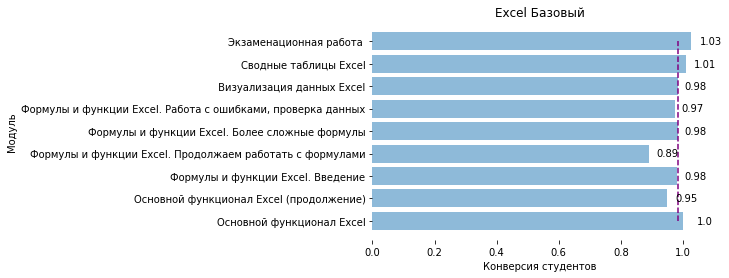

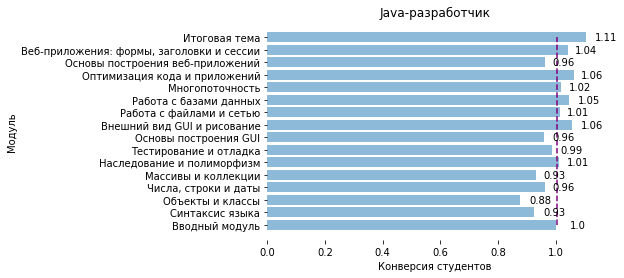

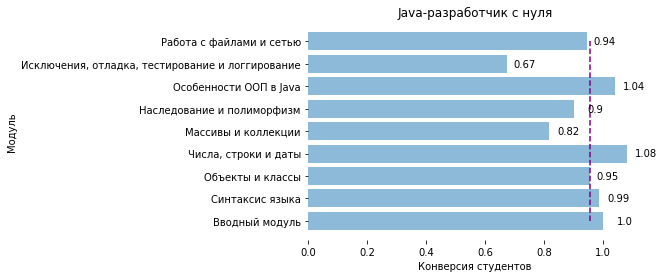

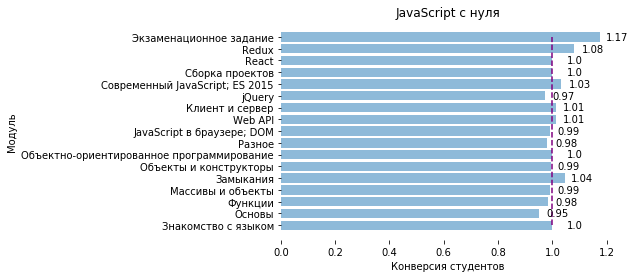

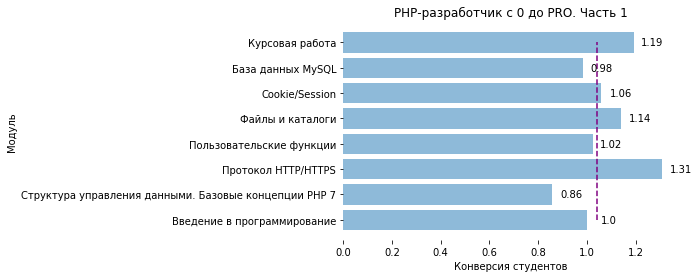

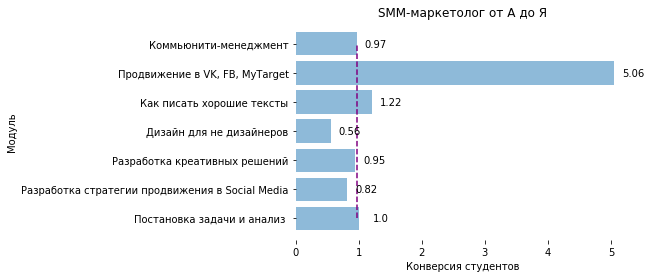

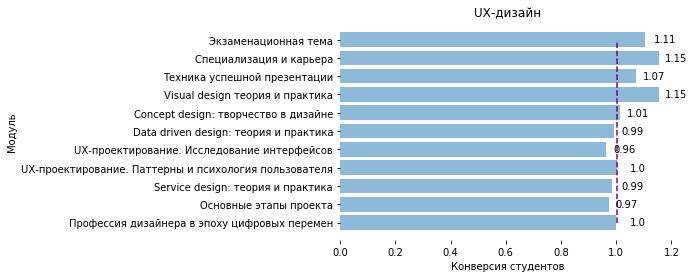

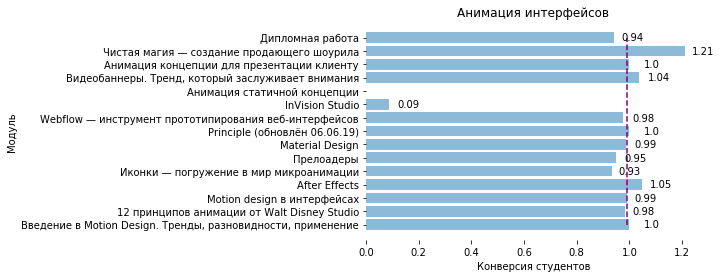

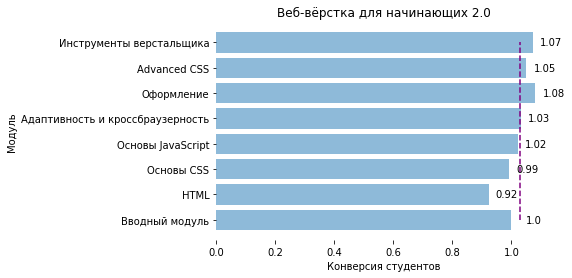

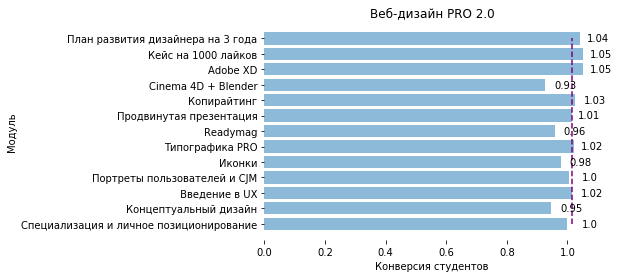

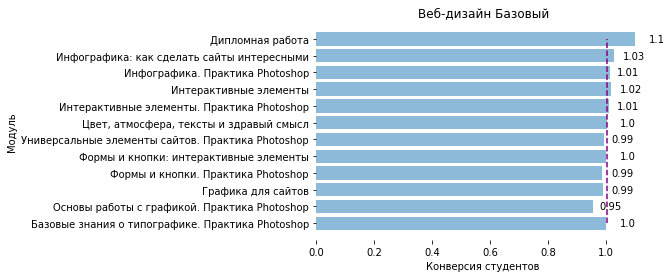

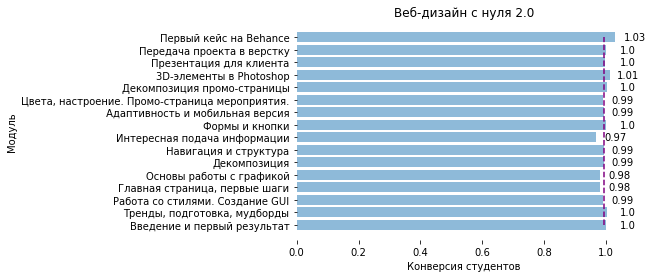

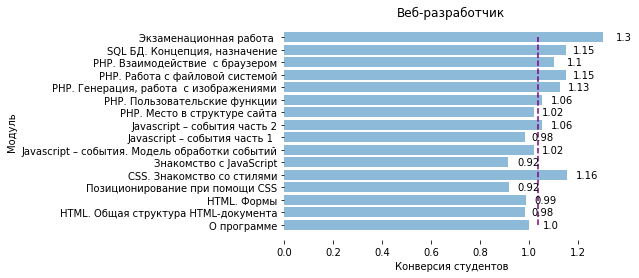

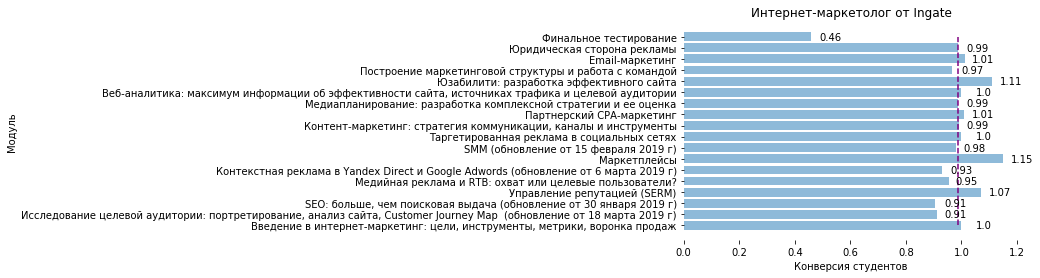

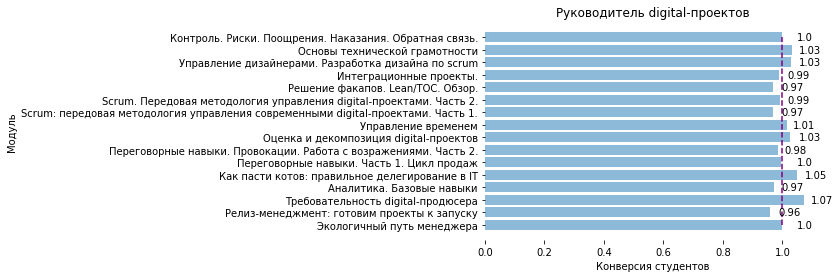

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Используется для работы с датами на графике

print('4.3. Горизонтальный график конверсии студентов от модуля к модулю')

courses_list = conversion_ratio.index.levels[0].drop_duplicates()  # Выгружаем список курсов

def printh_modules_conversion(courses_list):

    for course in courses_list:    
        fig, subplot = plt.subplots()  # Чтобы сделать 15 графиков нужно сделать область построения для каждого курса
        
        # Задаем ось X и ось Y по выделенному курсу
        y_ticks = conversion_ratio.loc[course].iloc[:, -1].index.get_level_values(level=0).to_list()
        x_ticks = conversion_ratio.loc[course]
        x_ticks = x_ticks.iloc[:, -1]
        x_ticks = x_ticks.fillna(1).to_list()  # Развернуть и приимаем конверсию равную 100% всем студентам первого модуля
        median_line = [np.median(x_ticks)] * len(x_ticks)
        
        subplot.barh(y_ticks, x_ticks, alpha=0.5)
        subplot.plot(median_line, y_ticks, linestyle='--', color='purple')
        
        
        
        # Подписи для графика
        for module_number, module_value in zip(y_ticks, np.round(x_ticks, 2)):
            plt.annotate(module_value, # this is the text
                         (module_value, module_number), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(30, -3), # distance from text to points (x,y)
                         ha='right') # horizontal alignment can be left, right or center
        plt.title(course) 
        plt.ylabel('Модуль')  # Подпись оси X
        plt.xlabel('Конверсия студентов')  # Подпись оси X
        #plt.grid()
        plt.box(False)  # Убирает рамку
        
        
printh_modules_conversion(courses_list.values) 


-------------------------------------------------------------------------
-------------------------------------------------------------------------
## Ключевые выводы по конверсии
<i>(выводы приведены по топ-3 направлениям: `Интернет-маркетолог от Ingate`, `Веб-дизайн с нуля 2.0`, `Веб-вёрстка для начинающих 2.0`)</i>

- Курс `Интернет-маркетолог от Ingate`. За все время курса конверсия имеет довольно сильные перепады - самый низкий уровень конверсии был на финальном модуле, но при этом конверсия на втором и третьем по порядку модулях <i>Исследование целевой аудитории</i> и <i>SEO: больше, чем поисковая выдача</i> была минимальной без учета финального задания и равна 91%, что говорит о том, что данные модули многие не заканчивают - это подтвреждается данными по времени прохождения модулей, рассмотренными в предыдущем разделе. 

    Также стоит отметить, что на курсе присутствуют значения конверсии больше, либо равные 100%, такое наблюдается на модулях: <i>Управление репутацией (SERM)</i>, <i>Маркетплейсы</i>, <i>Юзабилити: разработка эффективного сайта</i> и <i>Email-маркетинг</i> - это говорит о том, что многие студенты закончили данные модули, не приступая к предыдущим. Например, модуль <i>Контекстная реклама в Yandex Direct и Google Adwords</i>, идущий перед <i>Маркетплейсы</i>, имеет одну из самых низких конверсий на курсе, это может свидетельствовать о том, что материал студентами усваивается тяжело.

- Курс `Веб-дизайн с нуля 2.0`. За весь курс конверсия довольно стабильная - и колеблется в районе 97% и 101%, на финальном модуле <i>Первый кейс на Behance</i> - конверсия более 103%, что говорит о том, что к модулю приступают чаще, чем заканчивают предыдущий.

- Курс `Веб-верстка для начинающих 2.0`. Наибольшая часть модулей имело уровень конверсии в районе 99-108%, что выше, чем на курсах, рассмотренных выше, что говорит о том, что на данном курсе студенты чаще приступают к новым модулям закончив предыдущие. 

    Сильнее всего из общей массы выделяется модуль <i>HTML</i> - конверсия на нем была минимальной на курсе и равна 92%, что говорит о том, что к нему преступило меньше студентов, чем закончило <i>Вводный модуль</i>.

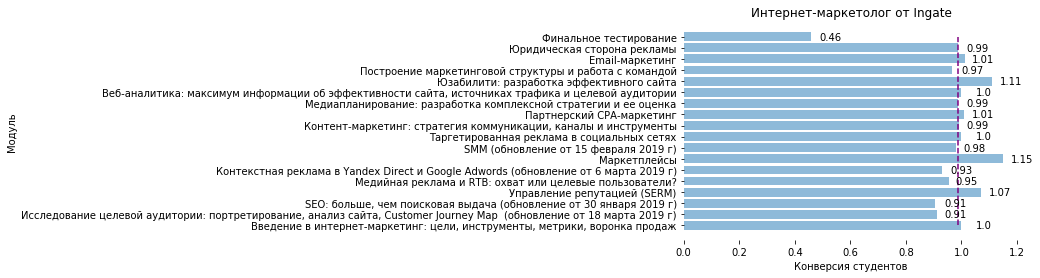

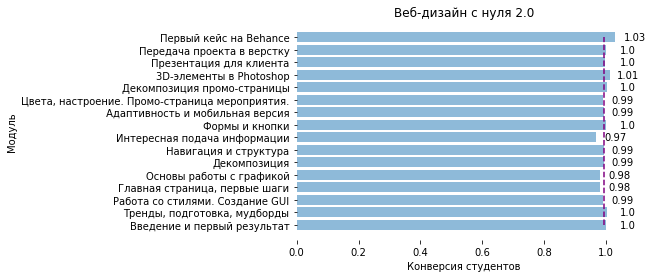

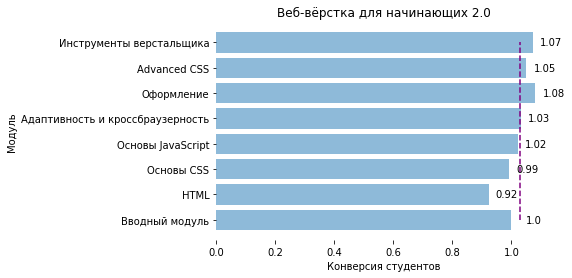

In [61]:
printh_modules_conversion(TOP3_INDEX)

## 5. Метрика успеваемости 

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. 

In [2]:
import pandas as pd
import numpy as np

# Загружается DataFrame для определения урока в котором проводится первое дз для каждого курса
main = pd.read_csv("Data/Total.csv", index_col=0)
print('Completed')

Completed


## Для анализа успеваемости можно предложить две метрики
- completion rate - % завершения студентом курса, считается как соотношение количества пройденных студентом модулей на курсе и общего количества модулей на курсе. Пройденным модуль считается, если выполнена последняя домашняя работа в модуле (даже если не завершены все модули)
- completion time - время, затраченное на прохождение курса

<i>Обе метрики предлагается сравнить с медианным значением, при существенном отклонение (более чем 30%) - можно предположить, что у студента проблемы с прохождением курса.
P.S. Чтобы учесть студентов, бросивших изучение курса (т.е. с незавершенными модулями), отмечаем дату окончания сегодняшней датой</i>

In [18]:
from datetime import datetime
print('5. Метрики успеваемости')


perfomance = main[main.is_homework == True][['student_id', 
                                             'progress_id', 
                                             'module_number', 
                                             'start_date', 'finish_date', 
                                             'course_title', "module_title"]]

# Преобразование дат в формат datetime
perfomance.finish_date = pd.to_datetime(perfomance.finish_date)
perfomance.start_date = pd.to_datetime(perfomance.start_date)

# Вырезаем незаконченные прогрессы для отдельного анализа
perfomance = perfomance.fillna(datetime.now())

# Меняем начало и конец для модулей, где несколько домашних заданий 
perfomance = perfomance.groupby(['student_id',
                                 'progress_id',
                                 'course_title',
                                 "module_title",
                                 'module_number'])
perfomance = perfomance.agg({'start_date' : np.min, 'finish_date' : np.max})
perfomance = perfomance.sort_values(['student_id', 'course_title', 'module_number'])
perfomance = perfomance.reset_index().set_index(['student_id', 'course_title'])

# Сохраняем в отдельный столбец время прохождения каждого модуля
perfomance['completion_time'] = perfomance.finish_date - perfomance.start_date

# Создаем массив с общим количеством модулей на каждом курсе, необходим для расчета completion_rate
number_of_modules = main[['course_title', 'module_number']].drop_duplicates()
number_of_modules = number_of_modules.groupby('course_title').agg(**{'modules_in_course' : ('module_number', np.max)}).sort_values('modules_in_course')
# ----------------------------------------------------------------------------------------------------------------------------------------------------

# Ниже расчет показателей успеваемости
def completion_rate(df):
    """Функция используется для расчета completion_rate"""
    course_name = df.index[0][1]  # Название курса
    modules_count = number_of_modules.loc[course_name][0]
    last_module_completed = np.max(df)  # Последний законченный модуль
    if last_module_completed == modules_count:
        # Возвращаем 100%, даже если не все модули сделаны, но студент завершил курс
        return 1.0
    else:
        # Считаем completion_rate как соотношение сделанных модулей и общего числа модулей
        result = np.count_nonzero(df) / modules_count
        return result

# Формируем таблицу результатов
perfomance = perfomance.groupby(['student_id', 'course_title']).agg(**{'modules_completed' :('module_number', np.count_nonzero),
                                                                       'completion_rate':('module_number', completion_rate), 
                                                                       'completion_time':('completion_time', np.sum)})
perfomance = perfomance.sort_values('completion_rate')
#------------------------------------------------------------------------------------------------------------------------------------------------------

# Формируем таблицу с медианами показателей completion_rate и времени затраченного на прохождение курса
benchmarks = perfomance.groupby(['course_title', 'modules_completed']).agg(median_completion_rate=('completion_rate', np.median)).reset_index()
benchmarks = benchmarks.merge(modules_completion['completion_time']['median'], 
                              how='left', 
                              left_on=['course_title', 'modules_completed'], 
                              right_on=['course_title', 'module_number'])
benchmarks.rename(columns={'median':'median_completion_time'}, inplace=True)
benchmarks = benchmarks.set_index(['course_title', 'modules_completed'])
benchmarks = benchmarks.fillna(timedelta(0))
benchmarks['median_completion_time'] = benchmarks['median_completion_time'].values.astype(np.int64)
benchmarks['median_completion_time'] = benchmarks.groupby(level=[0])['median_completion_time'].cumsum()
benchmarks['median_completion_time'] = pd.to_timedelta(benchmarks['median_completion_time'])

#------------------------------------------------------------------------------------------------------------------------------------------------------

# Формируем таблицу с "проблемными" студентами, сравнивая фактические результаты и бенчмарки
students_with_problems = perfomance.reset_index()
students_with_problems = students_with_problems.merge(benchmarks, how='left', 
                                                      left_on=['course_title', 'modules_completed'],
                                                      right_on=['course_title', 'modules_completed'])
# Убираем всех, кто закончил курс
students_with_problems = students_with_problems[students_with_problems.completion_rate < 1]
# Считаем отклонение от медианы
students_with_problems['difference'] = (students_with_problems.completion_time - students_with_problems.median_completion_time) / students_with_problems.median_completion_time
# Сохраняем тех, у кого отклонение во времени выполнения более 30% процентов
students_with_problems = students_with_problems[students_with_problems.difference > 0.3]
students_with_problems = students_with_problems.set_index(['student_id', 'course_title'])
print('Ниже приведена таблица с проблемными студентами')
students_with_problems.sort_values('completion_time').head(50)

5. Метрики успеваемости
Ниже приведена таблица с проблемными студентами


C:\Users\mi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\timedeltas.py:597: RuntimeWarning: divide by zero encountered in true_divide
  return other / self._data
C:\Users\mi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\timedeltas.py:597: RuntimeWarning: invalid value encountered in true_divide
  return other / self._data


,,modules_completed,completion_rate,completion_time,median_completion_rate,median_completion_time,difference
student_id,course_title,,,,,,
f2cd6e38e4919cf928f9da6e797954a6,Веб-дизайн Базовый,1,0.058824,1 days 23:19:44,0.058824,0 days 00:00:00,inf
5d1cca8c80da1a53cae105ba5112ff24,PHP-разработчик с 0 до PRO. Часть 1,1,0.125000,2 days 09:54:59,0.125000,1 days 16:20:04,0.435904
d153395a765671c6df10b2c8eec6b7aa,PHP-разработчик с 0 до PRO. Часть 1,1,0.125000,2 days 13:39:29,0.125000,1 days 16:20:04,0.528670
f3f8e7596d1f91d1c39e5cc75862135a,PHP-разработчик с 0 до PRO. Часть 1,1,0.125000,2 days 16:15:34,0.125000,1 days 16:20:04,0.593165
829ab71361e425b5ac1243f3d33441ca,Веб-дизайн Базовый,1,0.058824,2 days 23:35:23,0.058824,0 days 00:00:00,inf
e8d5402c05b59f57d1a5574db214de0e,PHP-разработчик с 0 до PRO. Часть 1,1,0.125000,3 days 01:48:32,0.125000,1 days 16:20:04,0.829922
ce42f99b2f6068325395cd32a3eca026,Excel Базовый,1,0.111111,3 days 02:58:38,0.111111,2 days 07:24:49.500000,0.353044
25b2045e028a0022f2e73e30ec413c3f,Интернет-маркетолог от Ingate,1,0.055556,3 days 03:13:30,0.055556,2 days 09:30:57,0.307901
db104734a3253e1173e4549cfbf88aa8,Интернет-маркетолог от Ingate,1,0.055556,3 days 03:38:13,0.055556,2 days 09:30:57,0.315063
